In [50]:
%pylab
%matplotlib inline
import random
import numpy as np
import pandas as pd
from math import sin
import seaborn as sns

import keras

from sklearn import neural_network
from sklearn import datasets, linear_model, metrics, neural_network, model_selection

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD   # Stochastic Gradient Descent

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


/home/ga/anaconda2/envs/py3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'f', 'sin']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Neural Networks with SKlearn

Neural networks were added to sklearn in v0.18 (currently 0.19.1). They are a simple way to get started using the familiar sklearn syntax (instantiate, fit, ...do something). It builds the input and output layers automagically and by default makes a 1 * 100 hidden layer. But it's limited in it's ability (for example, there is 0 GPU support and never will be and networks are limited to dense networks).

/home/ga/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ga/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/ga/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


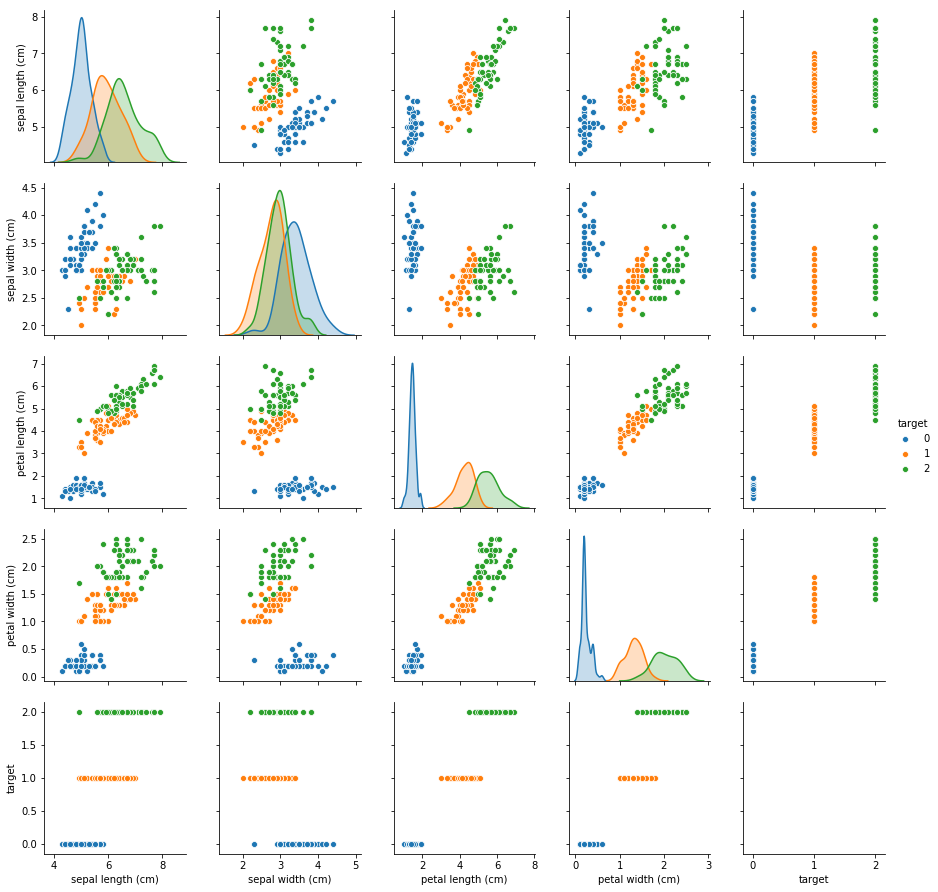

In [34]:
iris = datasets.load_iris()
plotdf = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
plotdf['target'] = iris['target']
sns.pairplot(plotdf, hue = 'target');

In [9]:
X = data['data']
y = data['target']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    test_size = 0.80, 
                                                                    random_state = 1010, 
                                                                    shuffle = True)

In [10]:
nn = neural_network.MLPClassifier(random_state = 1010, verbose = 10).fit(X_train, y_train)
nn_preds = nn.predict(X_test)
print(metrics.accuracy_score(nn_preds, y_test))
pd.DataFrame(metrics.confusion_matrix(nn_preds, y_test))

Iteration 1, loss = 1.63975824
Iteration 2, loss = 1.57773444
Iteration 3, loss = 1.51940338
Iteration 4, loss = 1.46497902
Iteration 5, loss = 1.41496848
Iteration 6, loss = 1.36967187
Iteration 7, loss = 1.32898151
Iteration 8, loss = 1.29261195
Iteration 9, loss = 1.26080046
Iteration 10, loss = 1.23325745
Iteration 11, loss = 1.20972942
Iteration 12, loss = 1.18956521
Iteration 13, loss = 1.17213434
Iteration 14, loss = 1.15671665
Iteration 15, loss = 1.14294746
Iteration 16, loss = 1.12999354
Iteration 17, loss = 1.11743634
Iteration 18, loss = 1.10473093
Iteration 19, loss = 1.09160217
Iteration 20, loss = 1.07796792
Iteration 21, loss = 1.06373792
Iteration 22, loss = 1.04906411
Iteration 23, loss = 1.03398692
Iteration 24, loss = 1.01886982
Iteration 25, loss = 1.00408522
Iteration 26, loss = 0.98977132
Iteration 27, loss = 0.97597760
Iteration 28, loss = 0.96278027
Iteration 29, loss = 0.95023115
Iteration 30, loss = 0.93827971
Iteration 31, loss = 0.92695410
Iteration 32, los

/home/ga/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,0,1,2
0,39,0,0
1,0,35,0
2,0,4,42


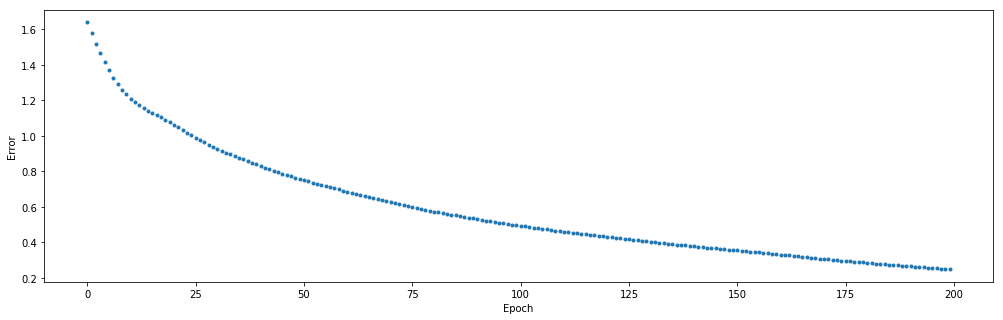

In [11]:
yplot = nn.loss_curve_
plt.figure(figsize = [17,5])
plt.plot(yplot, '.');
plt.xlabel('Epoch');
plt.ylabel('Error');

In [12]:
lm = linear_model.LogisticRegression(random_state = 1010).fit(X_train, y_train)
lm_preds = lm.predict(X_test)
print(metrics.accuracy_score(lm_preds, y_test))
pd.DataFrame(metrics.confusion_matrix(lm_preds, y_test))

0.9416666666666667


,0,1,2
0,39,0,0
1,0,32,0
2,0,7,42


Neural networks are infamous not because they're hard (now. With current software...) but because there's a lot of tweaking of parameters (so lots of time spent in calculation) AND the weights / biases make sense to the network alone.

Have a play with some of the parameters - 

eg: when in doubt, ADD MORE LAYERS!... hidden_layer_sizes = (50,50,50) will make neural network with three hidden layers consisting of 50 neurons each.

eg: Convergence warning? Up the number of max_iter (aka epochs. Default 200).

eg. Try some different activation functions.

In [13]:
nn = neural_network.MLPClassifier(random_state = 1010).fit(X_train, y_train)
nn_preds = nn.predict(X_test)
print(metrics.accuracy_score(nn_preds, y_test))
pd.DataFrame(metrics.confusion_matrix(nn_preds, y_test))

0.9666666666666667


/home/ga/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,0,1,2
0,39,0,0
1,0,35,0
2,0,4,42


# Neural Networks with Keras

Keras is a step up from sklearn. Keras is a wrapper for lower level neural network libraries (aka Backend - currently either Tensorflow & Theano [now dead]). It gives you the ability to build networks of any type that the backend handles (including dense, sparse, recurrent, deeeeeeeeep) and offers a range of error metrics.

If you want **MORE POWAH** (more power = higher learning curve to use), tensorflow and pytorch are currently fighting it out to see who will be the reigning champion.

## Neural Network Regression

### Polynomial Regression

Let's train a neural network on a few different shapes. First we start with a polynomial (a cubic).

In [14]:
# Create some data

def f(x):
    return x ** 3 - 5 * x + 12 + random.random()

X = np.linspace(-1, 1, 1000).reshape(-1, 1)
y = np.array(list(map(f, X)))

print(X.shape, y.shape)

(1000, 1) (1000, 1)


In [22]:
# Define a Feed Forward NN

# input_dim = number of neurons in previous layer.
# units = number of neurons in current layer.

model = Sequential() #Create a fully connected model.
model.add(Dense(input_dim = 1, units = 5)) #There is 1 independant variable (X matrix)
model.add(Activation('tanh')) #This is the activation function used for the hidden layer.
model.add(Dense(input_dim = 5, units = 1)) #From 5 neurons, the output is summed...
model.add(Activation('linear')) #And run through a linear activation function (regression)

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.01))

In [23]:
# Train the model
print('Training...')
loss = model.fit(X, y, epochs = 500, validation_split = 0.1, 
                 batch_size = 128, verbose = False)
print(loss.history['loss'][-1])
print("Done")

Training...
0.08233515527513292
Done


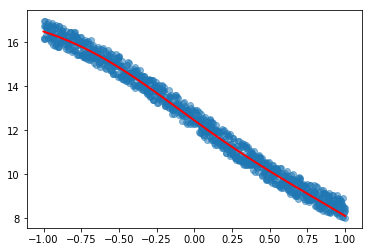

MSE: 0.08513865501410288


In [24]:
# Plot the predictions
predictions = model.predict(X)

plt.scatter(X, y, alpha = 0.5)
plt.plot(X, predictions, color = 'r', linewidth = 2)
plt.show()

print("MSE: {}".format(metrics.mean_squared_error(predictions, y)))

### Sine Regression

In [9]:
# Sine data
X = np.linspace(0, 2 * np.pi, 500).reshape(-1,1)
y = np.sin(X)

print(X.shape, y.shape)

(500, 1) (500, 1)


In [25]:
# Create the model
model = Sequential()
model.add(Dense(input_dim = 1, units = 5))
model.add(Activation('tanh'))
model.add(Dense(input_dim = 5, units = 1))
model.add(Activation('linear'))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.1))

### Train the Model

In [26]:
#Model is trained using 150 epochs (feedforward + backprop, using 128 samples)
print('Training..')
loss = model.fit(X, y, epochs = 150, validation_split = 0.1, 
                 batch_size = 128, verbose=False)
print(loss.history['loss'][-1])
print('Complete')

Training..
0.08900470270050896
Complete


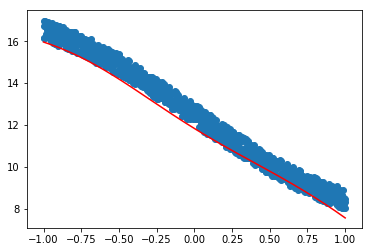

MSE: 0.4143477445718229


In [27]:
# Plot the predictions
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color = 'r')
plt.show()
print("MSE: {}".format(metrics.mean_squared_error(predictions, y)))

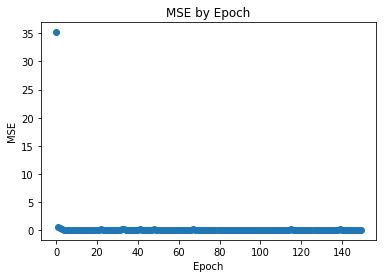

In [28]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])

# plt.scatter(range(len(loss.history['val_loss'])), loss.history['val_loss'], color='red')

plt.xlabel('Epoch');
plt.ylabel('MSE');

plt.title('MSE by Epoch');

### Train longer

If we train for more epochs, we can get a better regression.

(1000, 1) (1000, 1)
Training..
Train on 900 samples, validate on 100 samples
Epoch 1/3000
900/900 [==============================] - 0s 236us/step - loss: 0.9474 - val_loss: 0.0355
Epoch 2/3000
900/900 [==============================] - 0s 11us/step - loss: 0.3544 - val_loss: 0.0342
Epoch 3/3000
900/900 [==============================] - 0s 14us/step - loss: 0.2230 - val_loss: 0.0442
Epoch 4/3000
900/900 [==============================] - 0s 13us/step - loss: 0.1765 - val_loss: 0.0400
Epoch 5/3000
900/900 [==============================] - 0s 20us/step - loss: 0.1716 - val_loss: 0.0537
Epoch 6/3000
900/900 [==============================] - 0s 9us/step - loss: 0.1406 - val_loss: 0.3805
Epoch 7/3000
900/900 [==============================] - 0s 14us/step - loss: 0.1240 - val_loss: 0.4853
Epoch 8/3000
900/900 [==============================] - 0s 13us/step - loss: 0.1135 - val_loss: 0.5506
Epoch 9/3000
900/900 [==============================] - 0s 10us/step - loss: 0.1124 - val_loss: 0.6

900/900 [==============================] - 0s 14us/step - loss: 0.0146 - val_loss: 0.8021
Epoch 80/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0184 - val_loss: 0.6496
Epoch 81/3000
900/900 [==============================] - 0s 15us/step - loss: 0.0142 - val_loss: 0.5745
Epoch 82/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0141 - val_loss: 0.5149
Epoch 83/3000
900/900 [==============================] - 0s 14us/step - loss: 0.0153 - val_loss: 0.4490
Epoch 84/3000
900/900 [==============================] - 0s 13us/step - loss: 0.0172 - val_loss: 0.4867
Epoch 85/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0177 - val_loss: 0.5937
Epoch 86/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0144 - val_loss: 0.5820
Epoch 87/3000
900/900 [==============================] - 0s 16us/step - loss: 0.0138 - val_loss: 0.5438
Epoch 88/3000
900/900 [==============================] - 0s 11us/step - loss: 0

900/900 [==============================] - 0s 17us/step - loss: 0.0113 - val_loss: 0.5981
Epoch 158/3000
900/900 [==============================] - 0s 16us/step - loss: 0.0107 - val_loss: 0.6464
Epoch 159/3000
900/900 [==============================] - 0s 13us/step - loss: 0.0117 - val_loss: 0.6962
Epoch 160/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0130 - val_loss: 0.6209
Epoch 161/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0109 - val_loss: 0.5895
Epoch 162/3000
900/900 [==============================] - 0s 16us/step - loss: 0.0107 - val_loss: 0.5511
Epoch 163/3000
900/900 [==============================] - 0s 14us/step - loss: 0.0108 - val_loss: 0.5092
Epoch 164/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0110 - val_loss: 0.5834
Epoch 165/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0107 - val_loss: 0.5992
Epoch 166/3000
900/900 [==============================] - 0s 9us/step 

900/900 [==============================] - 0s 15us/step - loss: 0.0093 - val_loss: 0.5230
Epoch 236/3000
900/900 [==============================] - 0s 16us/step - loss: 0.0095 - val_loss: 0.5084
Epoch 237/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0092 - val_loss: 0.4751
Epoch 238/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0099 - val_loss: 0.5040
Epoch 239/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0092 - val_loss: 0.4909
Epoch 240/3000
900/900 [==============================] - 0s 13us/step - loss: 0.0097 - val_loss: 0.5849
Epoch 241/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0094 - val_loss: 0.5638
Epoch 242/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0092 - val_loss: 0.5372
Epoch 243/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0091 - val_loss: 0.5387
Epoch 244/3000
900/900 [==============================] - 0s 12us/step 

Epoch 313/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0090 - val_loss: 0.5062
Epoch 314/3000
900/900 [==============================] - 0s 22us/step - loss: 0.0084 - val_loss: 0.4882
Epoch 315/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0088 - val_loss: 0.4936
Epoch 316/3000
900/900 [==============================] - 0s 16us/step - loss: 0.0084 - val_loss: 0.5361
Epoch 317/3000
900/900 [==============================] - 0s 20us/step - loss: 0.0083 - val_loss: 0.4937
Epoch 318/3000
900/900 [==============================] - 0s 14us/step - loss: 0.0085 - val_loss: 0.5321
Epoch 319/3000
900/900 [==============================] - 0s 13us/step - loss: 0.0083 - val_loss: 0.5411
Epoch 320/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0084 - val_loss: 0.5537
Epoch 321/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0087 - val_loss: 0.4840
Epoch 322/3000
900/900 [==============================]

Epoch 391/3000
900/900 [==============================] - 0s 14us/step - loss: 0.0081 - val_loss: 0.4911
Epoch 392/3000
900/900 [==============================] - 0s 16us/step - loss: 0.0077 - val_loss: 0.4952
Epoch 393/3000
900/900 [==============================] - 0s 14us/step - loss: 0.0078 - val_loss: 0.5093
Epoch 394/3000
900/900 [==============================] - 0s 16us/step - loss: 0.0078 - val_loss: 0.5113
Epoch 395/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0078 - val_loss: 0.5159
Epoch 396/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0078 - val_loss: 0.4876
Epoch 397/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0077 - val_loss: 0.5403
Epoch 398/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0083 - val_loss: 0.5195
Epoch 399/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0078 - val_loss: 0.4570
Epoch 400/3000
900/900 [==============================] 

900/900 [==============================] - 0s 16us/step - loss: 0.0079 - val_loss: 0.4896
Epoch 470/3000
900/900 [==============================] - 0s 15us/step - loss: 0.0074 - val_loss: 0.4855
Epoch 471/3000
900/900 [==============================] - 0s 13us/step - loss: 0.0073 - val_loss: 0.4864
Epoch 472/3000
900/900 [==============================] - 0s 14us/step - loss: 0.0072 - val_loss: 0.4581
Epoch 473/3000
900/900 [==============================] - 0s 20us/step - loss: 0.0072 - val_loss: 0.4563
Epoch 474/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0072 - val_loss: 0.5188
Epoch 475/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0075 - val_loss: 0.4422
Epoch 476/3000
900/900 [==============================] - 0s 16us/step - loss: 0.0071 - val_loss: 0.4742
Epoch 477/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0072 - val_loss: 0.4460
Epoch 478/3000
900/900 [==============================] - 0s 14us/step 

900/900 [==============================] - 0s 9us/step - loss: 0.0059 - val_loss: 0.4338
Epoch 548/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0060 - val_loss: 0.4093
Epoch 549/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0059 - val_loss: 0.4374
Epoch 550/3000
900/900 [==============================] - 0s 13us/step - loss: 0.0060 - val_loss: 0.3868
Epoch 551/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0065 - val_loss: 0.4180
Epoch 552/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0059 - val_loss: 0.3310
Epoch 553/3000
900/900 [==============================] - 0s 15us/step - loss: 0.0066 - val_loss: 0.3786
Epoch 554/3000
900/900 [==============================] - 0s 15us/step - loss: 0.0058 - val_loss: 0.4298
Epoch 555/3000
900/900 [==============================] - 0s 17us/step - loss: 0.0061 - val_loss: 0.4018
Epoch 556/3000
900/900 [==============================] - 0s 13us/step 

900/900 [==============================] - 0s 9us/step - loss: 0.0043 - val_loss: 0.3441
Epoch 626/3000
900/900 [==============================] - 0s 13us/step - loss: 0.0043 - val_loss: 0.3176
Epoch 627/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0049 - val_loss: 0.3505
Epoch 628/3000
900/900 [==============================] - 0s 13us/step - loss: 0.0048 - val_loss: 0.3789
Epoch 629/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0053 - val_loss: 0.3197
Epoch 630/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0043 - val_loss: 0.3293
Epoch 631/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0043 - val_loss: 0.3418
Epoch 632/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0043 - val_loss: 0.2487
Epoch 633/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0053 - val_loss: 0.4615
Epoch 634/3000
900/900 [==============================] - 0s 9us/step -

900/900 [==============================] - 0s 13us/step - loss: 0.0044 - val_loss: 0.2456
Epoch 704/3000
900/900 [==============================] - 0s 15us/step - loss: 0.0044 - val_loss: 0.3069
Epoch 705/3000
900/900 [==============================] - 0s 18us/step - loss: 0.0045 - val_loss: 0.2941
Epoch 706/3000
900/900 [==============================] - 0s 33us/step - loss: 0.0046 - val_loss: 0.2966
Epoch 707/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0062 - val_loss: 0.2940
Epoch 708/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0045 - val_loss: 0.3775
Epoch 709/3000
900/900 [==============================] - 0s 15us/step - loss: 0.0052 - val_loss: 0.3499
Epoch 710/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0062 - val_loss: 0.3492
Epoch 711/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0052 - val_loss: 0.3177
Epoch 712/3000
900/900 [==============================] - 0s 13us/step

900/900 [==============================] - 0s 9us/step - loss: 0.0039 - val_loss: 0.2902
Epoch 782/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0041 - val_loss: 0.3686
Epoch 783/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0049 - val_loss: 0.4206
Epoch 784/3000
900/900 [==============================] - 0s 13us/step - loss: 0.0075 - val_loss: 0.4014
Epoch 785/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0084 - val_loss: 0.4385
Epoch 786/3000
900/900 [==============================] - 0s 14us/step - loss: 0.0079 - val_loss: 0.4340
Epoch 787/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0061 - val_loss: 0.3448
Epoch 788/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0044 - val_loss: 0.3605
Epoch 789/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0050 - val_loss: 0.2174
Epoch 790/3000
900/900 [==============================] - 0s 10us/step - 

900/900 [==============================] - 0s 8us/step - loss: 0.0049 - val_loss: 0.1804
Epoch 860/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0068 - val_loss: 0.1628
Epoch 861/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0066 - val_loss: 0.2838
Epoch 862/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0035 - val_loss: 0.2200
Epoch 863/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0050 - val_loss: 0.2659
Epoch 864/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0035 - val_loss: 0.2000
Epoch 865/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0053 - val_loss: 0.2929
Epoch 866/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0039 - val_loss: 0.3043
Epoch 867/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0035 - val_loss: 0.3351
Epoch 868/3000
900/900 [==============================] - 0s 7us/step - loss

900/900 [==============================] - 0s 9us/step - loss: 0.0039 - val_loss: 0.2791
Epoch 938/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0040 - val_loss: 0.1553
Epoch 939/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0077 - val_loss: 0.3086
Epoch 940/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0036 - val_loss: 0.2218
Epoch 941/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0083 - val_loss: 0.2382
Epoch 942/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0074 - val_loss: 0.2072
Epoch 943/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0038 - val_loss: 0.2644
Epoch 944/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0042 - val_loss: 0.2299
Epoch 945/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0074 - val_loss: 0.1762
Epoch 946/3000
900/900 [==============================] - 0s 8us/step - loss:

900/900 [==============================] - 0s 9us/step - loss: 0.0056 - val_loss: 0.2940
Epoch 1016/3000
900/900 [==============================] - 0s 15us/step - loss: 0.0039 - val_loss: 0.2293
Epoch 1017/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0042 - val_loss: 0.2537
Epoch 1018/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0037 - val_loss: 0.2999
Epoch 1019/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0048 - val_loss: 0.3021
Epoch 1020/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0032 - val_loss: 0.2663
Epoch 1021/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0032 - val_loss: 0.2466
Epoch 1022/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0034 - val_loss: 0.2322
Epoch 1023/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0034 - val_loss: 0.3331
Epoch 1024/3000
900/900 [==============================] - 0s 1

Epoch 1093/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0036 - val_loss: 0.3300
Epoch 1094/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0048 - val_loss: 0.2405
Epoch 1095/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0033 - val_loss: 0.3080
Epoch 1096/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0039 - val_loss: 0.2146
Epoch 1097/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0037 - val_loss: 0.1138
Epoch 1098/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0116 - val_loss: 0.1750
Epoch 1099/3000
900/900 [==============================] - 0s 14us/step - loss: 0.0144 - val_loss: 0.2212
Epoch 1100/3000
900/900 [==============================] - 0s 31us/step - loss: 0.0030 - val_loss: 0.2675
Epoch 1101/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0031 - val_loss: 0.2931
Epoch 1102/3000
900/900 [========================

900/900 [==============================] - 0s 13us/step - loss: 0.0035 - val_loss: 0.4908
Epoch 1171/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0131 - val_loss: 0.4115
Epoch 1172/3000
900/900 [==============================] - 0s 16us/step - loss: 0.0087 - val_loss: 0.3461
Epoch 1173/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0058 - val_loss: 0.2850
Epoch 1174/3000
900/900 [==============================] - 0s 15us/step - loss: 0.0032 - val_loss: 0.2767
Epoch 1175/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0029 - val_loss: 0.1839
Epoch 1176/3000
900/900 [==============================] - 0s 13us/step - loss: 0.0038 - val_loss: 0.2269
Epoch 1177/3000
900/900 [==============================] - 0s 15us/step - loss: 0.0031 - val_loss: 0.2640
Epoch 1178/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0029 - val_loss: 0.3115
Epoch 1179/3000
900/900 [==============================] - 0s 1

900/900 [==============================] - 0s 11us/step - loss: 0.0033 - val_loss: 0.2722
Epoch 1248/3000
900/900 [==============================] - 0s 13us/step - loss: 0.0027 - val_loss: 0.2328
Epoch 1249/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0030 - val_loss: 0.2563
Epoch 1250/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0029 - val_loss: 0.1985
Epoch 1251/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0031 - val_loss: 0.3217
Epoch 1252/3000
900/900 [==============================] - 0s 13us/step - loss: 0.0049 - val_loss: 0.3020
Epoch 1253/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0042 - val_loss: 0.2845
Epoch 1254/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0056 - val_loss: 0.3086
Epoch 1255/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0050 - val_loss: 0.1494
Epoch 1256/3000
900/900 [==============================] - 0s 9u

900/900 [==============================] - 0s 9us/step - loss: 0.0047 - val_loss: 0.2335
Epoch 1325/3000
900/900 [==============================] - 0s 13us/step - loss: 0.0031 - val_loss: 0.1552
Epoch 1326/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0037 - val_loss: 0.1143
Epoch 1327/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0061 - val_loss: 0.2249
Epoch 1328/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0026 - val_loss: 0.3266
Epoch 1329/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0036 - val_loss: 0.2589
Epoch 1330/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0029 - val_loss: 0.2717
Epoch 1331/3000
900/900 [==============================] - 0s 13us/step - loss: 0.0027 - val_loss: 0.2684
Epoch 1332/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0029 - val_loss: 0.3066
Epoch 1333/3000
900/900 [==============================] - 0s 11

900/900 [==============================] - 0s 8us/step - loss: 0.0065 - val_loss: 0.2493
Epoch 1402/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0029 - val_loss: 0.2910
Epoch 1403/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0029 - val_loss: 0.4193
Epoch 1404/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0135 - val_loss: 0.2082
Epoch 1405/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0027 - val_loss: 0.2891
Epoch 1406/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0054 - val_loss: 0.1908
Epoch 1407/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0045 - val_loss: 0.1360
Epoch 1408/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0180 - val_loss: 0.2488
Epoch 1409/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.2943
Epoch 1410/3000
900/900 [==============================] - 0s 12us/s

Epoch 1479/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0050 - val_loss: 0.1506
Epoch 1480/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0086 - val_loss: 0.1463
Epoch 1481/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0037 - val_loss: 0.3353
Epoch 1482/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0055 - val_loss: 0.3226
Epoch 1483/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0048 - val_loss: 0.3491
Epoch 1484/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0053 - val_loss: 0.2356
Epoch 1485/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0024 - val_loss: 0.2172
Epoch 1486/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0023 - val_loss: 0.1259
Epoch 1487/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0051 - val_loss: 0.2349
Epoch 1488/3000
900/900 [==============================

Epoch 1557/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0030 - val_loss: 0.2002
Epoch 1558/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 0.2417
Epoch 1559/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0027 - val_loss: 0.2149
Epoch 1560/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0022 - val_loss: 0.2360
Epoch 1561/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0028 - val_loss: 0.2663
Epoch 1562/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0032 - val_loss: 0.3357
Epoch 1563/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0057 - val_loss: 0.2456
Epoch 1564/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0024 - val_loss: 0.2544
Epoch 1565/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0026 - val_loss: 0.1466
Epoch 1566/3000
900/900 [=======================

900/900 [==============================] - 0s 8us/step - loss: 0.0022 - val_loss: 0.2400
Epoch 1635/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0022 - val_loss: 0.1722
Epoch 1636/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0033 - val_loss: 0.3217
Epoch 1637/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0049 - val_loss: 0.1390
Epoch 1638/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0033 - val_loss: 0.0765
Epoch 1639/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0081 - val_loss: 0.2089
Epoch 1640/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0024 - val_loss: 0.1558
Epoch 1641/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0053 - val_loss: 0.1294
Epoch 1642/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0032 - val_loss: 0.2581
Epoch 1643/3000
900/900 [==============================] - 0s 9us/st

Epoch 1712/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0032 - val_loss: 0.0673
Epoch 1713/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0124 - val_loss: 0.1079
Epoch 1714/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0058 - val_loss: 0.1869
Epoch 1715/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0021 - val_loss: 0.1953
Epoch 1716/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0022 - val_loss: 0.1954
Epoch 1717/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0020 - val_loss: 0.2483
Epoch 1718/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0028 - val_loss: 0.0864
Epoch 1719/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0061 - val_loss: 0.1824
Epoch 1720/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0021 - val_loss: 0.2001
Epoch 1721/3000
900/900 [==============================

900/900 [==============================] - 0s 10us/step - loss: 0.0034 - val_loss: 0.2878
Epoch 1790/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0033 - val_loss: 0.2785
Epoch 1791/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0052 - val_loss: 0.2404
Epoch 1792/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0026 - val_loss: 0.1186
Epoch 1793/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0037 - val_loss: 0.0929
Epoch 1794/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0061 - val_loss: 0.1956
Epoch 1795/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0020 - val_loss: 0.0916
Epoch 1796/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0055 - val_loss: 0.1458
Epoch 1797/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0024 - val_loss: 0.1463
Epoch 1798/3000
900/900 [==============================] - 0s 11us

900/900 [==============================] - 0s 11us/step - loss: 0.0018 - val_loss: 0.3384
Epoch 1867/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0056 - val_loss: 0.1698
Epoch 1868/3000
900/900 [==============================] - 0s 13us/step - loss: 0.0018 - val_loss: 0.1777
Epoch 1869/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0018 - val_loss: 0.1402
Epoch 1870/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0022 - val_loss: 0.1657
Epoch 1871/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0019 - val_loss: 0.1526
Epoch 1872/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0026 - val_loss: 0.1422
Epoch 1873/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0023 - val_loss: 0.2155
Epoch 1874/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0027 - val_loss: 0.0907
Epoch 1875/3000
900/900 [==============================] - 0s 8us/s

900/900 [==============================] - 0s 13us/step - loss: 0.0028 - val_loss: 0.1723
Epoch 1945/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0018 - val_loss: 0.1716
Epoch 1946/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0022 - val_loss: 0.0968
Epoch 1947/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0079 - val_loss: 0.1168
Epoch 1948/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0066 - val_loss: 0.1876
Epoch 1949/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0019 - val_loss: 0.1832
Epoch 1950/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0019 - val_loss: 0.1720
Epoch 1951/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0018 - val_loss: 0.1453
Epoch 1952/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0021 - val_loss: 0.2328
Epoch 1953/3000
900/900 [==============================] - 0s 10u

900/900 [==============================] - 0s 10us/step - loss: 0.0018 - val_loss: 0.2034
Epoch 2022/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0017 - val_loss: 0.2696
Epoch 2023/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0025 - val_loss: 0.1215
Epoch 2024/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0022 - val_loss: 0.2573
Epoch 2025/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0025 - val_loss: 0.2419
Epoch 2026/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0034 - val_loss: 0.2734
Epoch 2027/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0044 - val_loss: 0.2207
Epoch 2028/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0036 - val_loss: 0.2638
Epoch 2029/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0048 - val_loss: 0.2662
Epoch 2030/3000
900/900 [==============================] - 0s 10us

Epoch 2099/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0017 - val_loss: 0.1814
Epoch 2100/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0019 - val_loss: 0.2118
Epoch 2101/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0025 - val_loss: 0.1606
Epoch 2102/3000
900/900 [==============================] - 0s 14us/step - loss: 0.0027 - val_loss: 0.1570
Epoch 2103/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 0.1459
Epoch 2104/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0016 - val_loss: 0.1450
Epoch 2105/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0019 - val_loss: 0.1290
Epoch 2106/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0033 - val_loss: 0.1806
Epoch 2107/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0019 - val_loss: 0.3009
Epoch 2108/3000
900/900 [=======================

900/900 [==============================] - 0s 11us/step - loss: 0.0019 - val_loss: 0.1456
Epoch 2177/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0022 - val_loss: 0.1594
Epoch 2178/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0017 - val_loss: 0.1730
Epoch 2179/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0017 - val_loss: 0.1834
Epoch 2180/3000
900/900 [==============================] - 0s 13us/step - loss: 0.0019 - val_loss: 0.1312
Epoch 2181/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0026 - val_loss: 0.1621
Epoch 2182/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0016 - val_loss: 0.1565
Epoch 2183/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0015 - val_loss: 0.1674
Epoch 2184/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0016 - val_loss: 0.1956
Epoch 2185/3000
900/900 [==============================] - 0s 

Epoch 2254/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0031 - val_loss: 0.1616
Epoch 2255/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0015 - val_loss: 0.1727
Epoch 2256/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0015 - val_loss: 0.1479
Epoch 2257/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0017 - val_loss: 0.1594
Epoch 2258/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0016 - val_loss: 0.1443
Epoch 2259/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0016 - val_loss: 0.1399
Epoch 2260/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0016 - val_loss: 0.1158
Epoch 2261/3000
900/900 [==============================] - 0s 6us/step - loss: 0.0022 - val_loss: 0.1687
Epoch 2262/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0017 - val_loss: 0.2149
Epoch 2263/3000
900/900 [==============================

Epoch 2332/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0027 - val_loss: 0.2094
Epoch 2333/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0023 - val_loss: 0.2000
Epoch 2334/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0017 - val_loss: 0.1449
Epoch 2335/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0016 - val_loss: 0.1288
Epoch 2336/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0018 - val_loss: 0.2410
Epoch 2337/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 0.1438
Epoch 2338/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0018 - val_loss: 0.0244
Epoch 2339/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0129 - val_loss: 0.1992
Epoch 2340/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 0.1207
Epoch 2341/3000
900/900 [=========================

900/900 [==============================] - 0s 9us/step - loss: 0.0060 - val_loss: 0.1694
Epoch 2410/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0016 - val_loss: 0.1994
Epoch 2411/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0026 - val_loss: 0.1422
Epoch 2412/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0016 - val_loss: 0.2064
Epoch 2413/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0032 - val_loss: 0.1450
Epoch 2414/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0015 - val_loss: 0.1525
Epoch 2415/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0015 - val_loss: 0.2276
Epoch 2416/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0032 - val_loss: 0.1059
Epoch 2417/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0018 - val_loss: 0.0727
Epoch 2418/3000
900/900 [==============================] - 0s 14us

Epoch 2487/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.1118
Epoch 2488/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0023 - val_loss: 0.0662
Epoch 2489/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0025 - val_loss: 0.1223
Epoch 2490/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0015 - val_loss: 0.1314
Epoch 2491/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0015 - val_loss: 0.1584
Epoch 2492/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0015 - val_loss: 0.1387
Epoch 2493/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0016 - val_loss: 0.1801
Epoch 2494/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0019 - val_loss: 0.0747
Epoch 2495/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0026 - val_loss: 0.0679
Epoch 2496/3000
900/900 [=============================

900/900 [==============================] - 0s 8us/step - loss: 0.0015 - val_loss: 0.1236
Epoch 2565/3000
900/900 [==============================] - 0s 13us/step - loss: 0.0013 - val_loss: 0.1709
Epoch 2566/3000
900/900 [==============================] - 0s 13us/step - loss: 0.0015 - val_loss: 0.0447
Epoch 2567/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0059 - val_loss: 0.1641
Epoch 2568/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0023 - val_loss: 0.2540
Epoch 2569/3000
900/900 [==============================] - 0s 14us/step - loss: 0.0047 - val_loss: 0.2282
Epoch 2570/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 0.1282
Epoch 2571/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0014 - val_loss: 0.1154
Epoch 2572/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0015 - val_loss: 0.1449
Epoch 2573/3000
900/900 [==============================] - 0s 7

900/900 [==============================] - 0s 9us/step - loss: 0.0026 - val_loss: 0.1468
Epoch 2642/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0019 - val_loss: 0.1022
Epoch 2643/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0015 - val_loss: 0.1100
Epoch 2644/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0023 - val_loss: 0.1460
Epoch 2645/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0013 - val_loss: 0.1750
Epoch 2646/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0030 - val_loss: 0.2099
Epoch 2647/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0030 - val_loss: 0.1247
Epoch 2648/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0015 - val_loss: 0.1928
Epoch 2649/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 0.1129
Epoch 2650/3000
900/900 [==============================] - 0s 10us/

Epoch 2719/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0013 - val_loss: 0.0647
Epoch 2720/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0044 - val_loss: 0.1438
Epoch 2721/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0014 - val_loss: 0.1384
Epoch 2722/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0026 - val_loss: 0.1107
Epoch 2723/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0013 - val_loss: 0.1612
Epoch 2724/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0025 - val_loss: 0.1427
Epoch 2725/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0020 - val_loss: 0.2368
Epoch 2726/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0042 - val_loss: 0.1989
Epoch 2727/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0028 - val_loss: 0.1276
Epoch 2728/3000
900/900 [=========================

900/900 [==============================] - 0s 21us/step - loss: 0.0058 - val_loss: 0.1592
Epoch 2797/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0022 - val_loss: 0.2327
Epoch 2798/3000
900/900 [==============================] - 0s 14us/step - loss: 0.0038 - val_loss: 0.0950
Epoch 2799/3000
900/900 [==============================] - 0s 11us/step - loss: 0.0013 - val_loss: 0.1538
Epoch 2800/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0014 - val_loss: 0.1393
Epoch 2801/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0012 - val_loss: 0.0809
Epoch 2802/3000
900/900 [==============================] - 0s 12us/step - loss: 0.0018 - val_loss: 0.1329
Epoch 2803/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0013 - val_loss: 0.1767
Epoch 2804/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0042 - val_loss: 0.1958
Epoch 2805/3000
900/900 [==============================] - 0s 9us

900/900 [==============================] - 0s 8us/step - loss: 0.0025 - val_loss: 0.1040
Epoch 2874/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0013 - val_loss: 0.1762
Epoch 2875/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0021 - val_loss: 0.1645
Epoch 2876/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0019 - val_loss: 0.1598
Epoch 2877/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0022 - val_loss: 0.1254
Epoch 2878/3000
900/900 [==============================] - 0s 10us/step - loss: 0.0016 - val_loss: 0.1386
Epoch 2879/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0014 - val_loss: 0.0984
Epoch 2880/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0015 - val_loss: 0.0795
Epoch 2881/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0042 - val_loss: 0.0821
Epoch 2882/3000
900/900 [==============================] - 0s 11us/ste

900/900 [==============================] - 0s 8us/step - loss: 0.0012 - val_loss: 0.1705
Epoch 2951/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0024 - val_loss: 0.1463
Epoch 2952/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0013 - val_loss: 0.0425
Epoch 2953/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0049 - val_loss: 0.0530
Epoch 2954/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0085 - val_loss: 0.0906
Epoch 2955/3000
900/900 [==============================] - 0s 7us/step - loss: 0.0029 - val_loss: 0.1432
Epoch 2956/3000
900/900 [==============================] - 0s 8us/step - loss: 0.0014 - val_loss: 0.1005
Epoch 2957/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0012 - val_loss: 0.1002
Epoch 2958/3000
900/900 [==============================] - 0s 9us/step - loss: 0.0017 - val_loss: 0.0448
Epoch 2959/3000
900/900 [==============================] - 0s 8us/step 

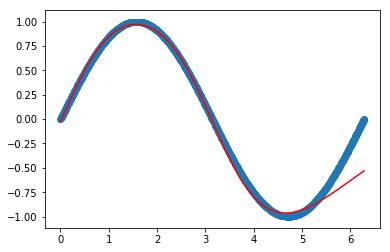

MSE: 0.013886876955996866


In [31]:
X = np.linspace(0, 2 * np.pi, 1000).reshape(-1,1)
y = np.sin(X)

print(X.shape, y.shape)

model = Sequential()
model.add(Dense(input_dim = 1, units = 5))
model.add(Activation('tanh'))
model.add(Dense(input_dim = 5, units = 1))
model.add(Activation('linear'))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.05))

print('Training..')
loss = model.fit(X, y, epochs = 3000, validation_split = 0.1, 
                 batch_size = 128, verbose = True)
print(loss.history['loss'][-1])
print('Complete')

# Plot
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='r')
plt.show()
print("MSE: {}".format(metrics.mean_squared_error(predictions, y)))

We can take a closer look at the error per training epoch.

Text(0.5,1,'MSE by Epoch')

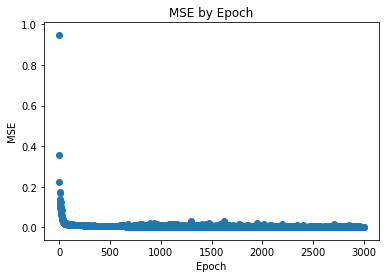

In [32]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')

### Exercise: Perform regression the following data
Hints:
* Try adding a hidden layer
* Try lowering the learning rate and using more epochs

In [14]:
def f(x):
    return x ** 2 * np.sin(x**2)

# Sine data
X = np.linspace(2, np.pi, 1000).reshape(-1,1)
y = np.array(list(map(f, X)))

print(X.shape, y.shape)

(1000, 1) (1000, 1)


Training..
0.0916458962692
Complete


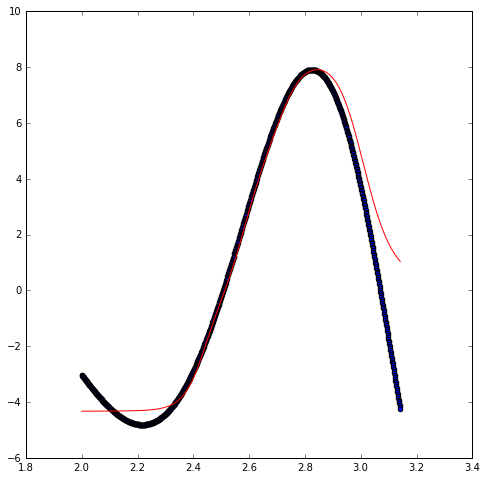

MSE 1.28391965568


In [15]:
model = Sequential()
#Add your input, hidden and output layers here - No hard and fast rules, 
#but use the above example to help.



model.compile(loss='mse', optimizer=SGD(???))

print('Training..')
loss = model.fit(X, y, nb_epoch = ???, validation_split=0.1, 
                 batch_size = ???, verbose=False)
print(loss.history['loss'][-1])
print('Complete')

# Plot
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color = 'r')
plt.show()
print("MSE: {}".format(metrics.mean_squared_error(predictions, y)))

## Classification

We'll start with the Iris dataset (of course).

In [35]:
X = iris['data']
y = iris['target']

# Break each output into indicator cols
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

(150, 4) (150, 3)


In [36]:
# Define a model
model = Sequential()
# First layer
model.add(Dense(input_dim = 4, units = 4))
model.add(Activation("tanh"))

#Hidden Layer
model.add(Dense(input_dim = 4, units = 4))
model.add(Activation("tanh"))


# Output layer - output_dim=# of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(input_dim = 4, units = 3))
model.add(Activation("softmax"))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer=SGD(lr=0.01))

In [38]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.1, nb_epoch=5000, 
                 batch_size=16, verbose = True)

print(loss.history['loss'][-1])   # displays MSE at last iteration
print("Training complete")

Training...
Train on 135 samples, validate on 15 samples
Epoch 1/5000
135/135 [==============================] - 0s 109us/step - loss: 0.0186 - val_loss: 0.0188
Epoch 2/5000
135/135 [==============================] - 0s 71us/step - loss: 0.0176 - val_loss: 0.0474
Epoch 3/5000
135/135 [==============================] - 0s 176us/step - loss: 0.0198 - val_loss: 0.0233
Epoch 4/5000
135/135 [==============================] - 0s 181us/step - loss: 0.0170 - val_loss: 0.0397
Epoch 5/5000
135/135 [==============================] - 0s 179us/step - loss: 0.0170 - val_loss: 0.0418
Epoch 6/5000
135/135 [==============================] - 0s 161us/step - loss: 0.0170 - val_loss: 0.0335
Epoch 7/5000
135/135 [==============================] - 0s 156us/step - loss: 0.0180 - val_loss: 0.0239
Epoch 8/5000
135/135 [==============================] - 0s 91us/step - loss: 0.0174 - val_loss: 0.0358
Epoch 9/5000
135/135 [==============================] - 0s 115us/step - loss: 0.0180 - val_loss: 0.0064
Epoch 10/

/home/ga/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


135/135 [==============================] - 0s 111us/step - loss: 0.0170 - val_loss: 0.0186
Epoch 12/5000
135/135 [==============================] - 0s 150us/step - loss: 0.0177 - val_loss: 0.0164
Epoch 13/5000
135/135 [==============================] - 0s 90us/step - loss: 0.0175 - val_loss: 0.0143
Epoch 14/5000
135/135 [==============================] - 0s 119us/step - loss: 0.0171 - val_loss: 0.0159
Epoch 15/5000
135/135 [==============================] - 0s 91us/step - loss: 0.0179 - val_loss: 0.0442
Epoch 16/5000
135/135 [==============================] - 0s 152us/step - loss: 0.0174 - val_loss: 0.0426
Epoch 17/5000
135/135 [==============================] - 0s 158us/step - loss: 0.0184 - val_loss: 0.0212
Epoch 18/5000
135/135 [==============================] - 0s 93us/step - loss: 0.0183 - val_loss: 0.0193
Epoch 19/5000
135/135 [==============================] - 0s 101us/step - loss: 0.0179 - val_loss: 0.0135
Epoch 20/5000
135/135 [==============================] - 0s 115us/step -

135/135 [==============================] - 0s 103us/step - loss: 0.0171 - val_loss: 0.0110
Epoch 90/5000
135/135 [==============================] - 0s 108us/step - loss: 0.0179 - val_loss: 0.0300
Epoch 91/5000
135/135 [==============================] - 0s 99us/step - loss: 0.0161 - val_loss: 0.0185
Epoch 92/5000
135/135 [==============================] - 0s 114us/step - loss: 0.0169 - val_loss: 0.0290
Epoch 93/5000
135/135 [==============================] - 0s 114us/step - loss: 0.0162 - val_loss: 0.0129
Epoch 94/5000
135/135 [==============================] - 0s 158us/step - loss: 0.0168 - val_loss: 0.0114
Epoch 95/5000
135/135 [==============================] - 0s 129us/step - loss: 0.0164 - val_loss: 0.0347
Epoch 96/5000
135/135 [==============================] - 0s 120us/step - loss: 0.0171 - val_loss: 0.0423
Epoch 97/5000
135/135 [==============================] - 0s 155us/step - loss: 0.0190 - val_loss: 0.0223
Epoch 98/5000
135/135 [==============================] - 0s 147us/step

135/135 [==============================] - 0s 136us/step - loss: 0.0150 - val_loss: 0.0149
Epoch 167/5000
135/135 [==============================] - 0s 129us/step - loss: 0.0157 - val_loss: 0.0391
Epoch 168/5000
135/135 [==============================] - 0s 132us/step - loss: 0.0166 - val_loss: 0.0214
Epoch 169/5000
135/135 [==============================] - 0s 125us/step - loss: 0.0161 - val_loss: 0.0119
Epoch 170/5000
135/135 [==============================] - 0s 90us/step - loss: 0.0164 - val_loss: 0.0168
Epoch 171/5000
135/135 [==============================] - 0s 125us/step - loss: 0.0165 - val_loss: 0.0192
Epoch 172/5000
135/135 [==============================] - 0s 123us/step - loss: 0.0166 - val_loss: 0.0202
Epoch 173/5000
135/135 [==============================] - 0s 110us/step - loss: 0.0160 - val_loss: 0.0237
Epoch 174/5000
135/135 [==============================] - 0s 103us/step - loss: 0.0156 - val_loss: 0.0131
Epoch 175/5000
135/135 [==============================] - 0s 1

135/135 [==============================] - 0s 165us/step - loss: 0.0155 - val_loss: 0.0141
Epoch 244/5000
135/135 [==============================] - 0s 110us/step - loss: 0.0164 - val_loss: 0.0133
Epoch 245/5000
135/135 [==============================] - 0s 126us/step - loss: 0.0154 - val_loss: 0.0209
Epoch 246/5000
135/135 [==============================] - 0s 115us/step - loss: 0.0159 - val_loss: 0.0157
Epoch 247/5000
135/135 [==============================] - 0s 124us/step - loss: 0.0166 - val_loss: 0.0136
Epoch 248/5000
135/135 [==============================] - 0s 128us/step - loss: 0.0158 - val_loss: 0.0351
Epoch 249/5000
135/135 [==============================] - 0s 135us/step - loss: 0.0159 - val_loss: 0.0129
Epoch 250/5000
135/135 [==============================] - 0s 146us/step - loss: 0.0174 - val_loss: 0.0148
Epoch 251/5000
135/135 [==============================] - 0s 135us/step - loss: 0.0155 - val_loss: 0.0281
Epoch 252/5000
135/135 [==============================] - 0s 

135/135 [==============================] - 0s 143us/step - loss: 0.0158 - val_loss: 0.0226
Epoch 321/5000
135/135 [==============================] - 0s 104us/step - loss: 0.0162 - val_loss: 0.0136
Epoch 322/5000
135/135 [==============================] - 0s 76us/step - loss: 0.0169 - val_loss: 0.0171
Epoch 323/5000
135/135 [==============================] - 0s 104us/step - loss: 0.0159 - val_loss: 0.0116
Epoch 324/5000
135/135 [==============================] - 0s 127us/step - loss: 0.0150 - val_loss: 0.0254
Epoch 325/5000
135/135 [==============================] - 0s 130us/step - loss: 0.0153 - val_loss: 0.0152
Epoch 326/5000
135/135 [==============================] - 0s 86us/step - loss: 0.0161 - val_loss: 0.0229
Epoch 327/5000
135/135 [==============================] - 0s 75us/step - loss: 0.0191 - val_loss: 0.0132
Epoch 328/5000
135/135 [==============================] - 0s 143us/step - loss: 0.0147 - val_loss: 0.0164
Epoch 329/5000
135/135 [==============================] - 0s 76u

135/135 [==============================] - 0s 136us/step - loss: 0.0147 - val_loss: 0.0098
Epoch 398/5000
135/135 [==============================] - 0s 143us/step - loss: 0.0146 - val_loss: 0.0259
Epoch 399/5000
135/135 [==============================] - 0s 146us/step - loss: 0.0147 - val_loss: 0.0170
Epoch 400/5000
135/135 [==============================] - 0s 146us/step - loss: 0.0145 - val_loss: 0.0529
Epoch 401/5000
135/135 [==============================] - 0s 164us/step - loss: 0.0162 - val_loss: 0.0096
Epoch 402/5000
135/135 [==============================] - 0s 132us/step - loss: 0.0158 - val_loss: 0.0128
Epoch 403/5000
135/135 [==============================] - 0s 85us/step - loss: 0.0149 - val_loss: 0.0171
Epoch 404/5000
135/135 [==============================] - 0s 136us/step - loss: 0.0145 - val_loss: 0.0166
Epoch 405/5000
135/135 [==============================] - 0s 120us/step - loss: 0.0152 - val_loss: 0.0095
Epoch 406/5000
135/135 [==============================] - 0s 1

135/135 [==============================] - 0s 130us/step - loss: 0.0155 - val_loss: 0.0163
Epoch 475/5000
135/135 [==============================] - 0s 115us/step - loss: 0.0146 - val_loss: 0.0141
Epoch 476/5000
135/135 [==============================] - 0s 167us/step - loss: 0.0156 - val_loss: 0.0143
Epoch 477/5000
135/135 [==============================] - 0s 98us/step - loss: 0.0151 - val_loss: 0.0089
Epoch 478/5000
135/135 [==============================] - 0s 112us/step - loss: 0.0151 - val_loss: 0.0105
Epoch 479/5000
135/135 [==============================] - 0s 108us/step - loss: 0.0152 - val_loss: 0.0098
Epoch 480/5000
135/135 [==============================] - 0s 120us/step - loss: 0.0143 - val_loss: 0.0162
Epoch 481/5000
135/135 [==============================] - 0s 135us/step - loss: 0.0142 - val_loss: 0.0208
Epoch 482/5000
135/135 [==============================] - 0s 134us/step - loss: 0.0144 - val_loss: 0.0229
Epoch 483/5000
135/135 [==============================] - 0s 1

135/135 [==============================] - 0s 86us/step - loss: 0.0162 - val_loss: 0.0093
Epoch 552/5000
135/135 [==============================] - 0s 125us/step - loss: 0.0153 - val_loss: 0.0166
Epoch 553/5000
135/135 [==============================] - 0s 100us/step - loss: 0.0148 - val_loss: 0.0236
Epoch 554/5000
135/135 [==============================] - 0s 144us/step - loss: 0.0140 - val_loss: 0.0105
Epoch 555/5000
135/135 [==============================] - 0s 115us/step - loss: 0.0140 - val_loss: 0.0087
Epoch 556/5000
135/135 [==============================] - 0s 120us/step - loss: 0.0143 - val_loss: 0.0168
Epoch 557/5000
135/135 [==============================] - 0s 146us/step - loss: 0.0136 - val_loss: 0.0109
Epoch 558/5000
135/135 [==============================] - 0s 138us/step - loss: 0.0138 - val_loss: 0.0070
Epoch 559/5000
135/135 [==============================] - 0s 135us/step - loss: 0.0151 - val_loss: 0.0064
Epoch 560/5000
135/135 [==============================] - 0s 1

135/135 [==============================] - 0s 126us/step - loss: 0.0158 - val_loss: 0.0138
Epoch 629/5000
135/135 [==============================] - 0s 112us/step - loss: 0.0138 - val_loss: 0.0217
Epoch 630/5000
135/135 [==============================] - 0s 117us/step - loss: 0.0139 - val_loss: 0.0184
Epoch 631/5000
135/135 [==============================] - 0s 105us/step - loss: 0.0150 - val_loss: 0.0101
Epoch 632/5000
135/135 [==============================] - 0s 117us/step - loss: 0.0138 - val_loss: 0.0186
Epoch 633/5000
135/135 [==============================] - 0s 114us/step - loss: 0.0146 - val_loss: 0.0140
Epoch 634/5000
135/135 [==============================] - 0s 109us/step - loss: 0.0157 - val_loss: 0.0144
Epoch 635/5000
135/135 [==============================] - 0s 108us/step - loss: 0.0130 - val_loss: 0.0470
Epoch 636/5000
135/135 [==============================] - 0s 149us/step - loss: 0.0159 - val_loss: 0.0100
Epoch 637/5000
135/135 [==============================] - 0s 

135/135 [==============================] - 0s 117us/step - loss: 0.0151 - val_loss: 0.0063
Epoch 706/5000
135/135 [==============================] - 0s 81us/step - loss: 0.0143 - val_loss: 0.0106
Epoch 707/5000
135/135 [==============================] - 0s 115us/step - loss: 0.0151 - val_loss: 0.0102
Epoch 708/5000
135/135 [==============================] - 0s 85us/step - loss: 0.0137 - val_loss: 0.0091
Epoch 709/5000
135/135 [==============================] - 0s 84us/step - loss: 0.0159 - val_loss: 0.0118
Epoch 710/5000
135/135 [==============================] - 0s 117us/step - loss: 0.0140 - val_loss: 0.0263
Epoch 711/5000
135/135 [==============================] - 0s 128us/step - loss: 0.0152 - val_loss: 0.0156
Epoch 712/5000
135/135 [==============================] - 0s 120us/step - loss: 0.0145 - val_loss: 0.0146
Epoch 713/5000
135/135 [==============================] - 0s 140us/step - loss: 0.0137 - val_loss: 0.0146
Epoch 714/5000
135/135 [==============================] - 0s 149

135/135 [==============================] - 0s 141us/step - loss: 0.0137 - val_loss: 0.0087
Epoch 783/5000
135/135 [==============================] - 0s 105us/step - loss: 0.0176 - val_loss: 0.0096
Epoch 784/5000
135/135 [==============================] - 0s 126us/step - loss: 0.0135 - val_loss: 0.0147
Epoch 785/5000
135/135 [==============================] - 0s 95us/step - loss: 0.0145 - val_loss: 0.0074
Epoch 786/5000
135/135 [==============================] - 0s 101us/step - loss: 0.0146 - val_loss: 0.0126
Epoch 787/5000
135/135 [==============================] - 0s 127us/step - loss: 0.0129 - val_loss: 0.0109
Epoch 788/5000
135/135 [==============================] - 0s 102us/step - loss: 0.0135 - val_loss: 0.0115
Epoch 789/5000
135/135 [==============================] - 0s 111us/step - loss: 0.0136 - val_loss: 0.0135
Epoch 790/5000
135/135 [==============================] - 0s 131us/step - loss: 0.0151 - val_loss: 0.0078
Epoch 791/5000
135/135 [==============================] - 0s 1

135/135 [==============================] - 0s 112us/step - loss: 0.0144 - val_loss: 0.0081
Epoch 860/5000
135/135 [==============================] - 0s 101us/step - loss: 0.0135 - val_loss: 0.0113
Epoch 861/5000
135/135 [==============================] - 0s 121us/step - loss: 0.0132 - val_loss: 0.0150
Epoch 862/5000
135/135 [==============================] - 0s 105us/step - loss: 0.0150 - val_loss: 0.0046
Epoch 863/5000
135/135 [==============================] - 0s 103us/step - loss: 0.0144 - val_loss: 0.0161
Epoch 864/5000
135/135 [==============================] - 0s 91us/step - loss: 0.0129 - val_loss: 0.0188
Epoch 865/5000
135/135 [==============================] - 0s 112us/step - loss: 0.0152 - val_loss: 0.0207
Epoch 866/5000
135/135 [==============================] - 0s 126us/step - loss: 0.0128 - val_loss: 0.0111
Epoch 867/5000
135/135 [==============================] - 0s 112us/step - loss: 0.0137 - val_loss: 0.0173
Epoch 868/5000
135/135 [==============================] - 0s 1

135/135 [==============================] - 0s 129us/step - loss: 0.0138 - val_loss: 0.0311
Epoch 937/5000
135/135 [==============================] - 0s 110us/step - loss: 0.0147 - val_loss: 0.0065
Epoch 938/5000
135/135 [==============================] - 0s 106us/step - loss: 0.0144 - val_loss: 0.0094
Epoch 939/5000
135/135 [==============================] - 0s 97us/step - loss: 0.0130 - val_loss: 0.0094
Epoch 940/5000
135/135 [==============================] - 0s 90us/step - loss: 0.0136 - val_loss: 0.0088
Epoch 941/5000
135/135 [==============================] - 0s 121us/step - loss: 0.0141 - val_loss: 0.0107
Epoch 942/5000
135/135 [==============================] - 0s 109us/step - loss: 0.0138 - val_loss: 0.0110
Epoch 943/5000
135/135 [==============================] - 0s 116us/step - loss: 0.0147 - val_loss: 0.0175
Epoch 944/5000
135/135 [==============================] - 0s 76us/step - loss: 0.0131 - val_loss: 0.0086
Epoch 945/5000
135/135 [==============================] - 0s 92u

135/135 [==============================] - 0s 123us/step - loss: 0.0140 - val_loss: 0.0074
Epoch 1014/5000
135/135 [==============================] - 0s 140us/step - loss: 0.0132 - val_loss: 0.0397
Epoch 1015/5000
135/135 [==============================] - 0s 113us/step - loss: 0.0142 - val_loss: 0.0145
Epoch 1016/5000
135/135 [==============================] - 0s 105us/step - loss: 0.0136 - val_loss: 0.0133
Epoch 1017/5000
135/135 [==============================] - 0s 146us/step - loss: 0.0146 - val_loss: 0.0099
Epoch 1018/5000
135/135 [==============================] - 0s 115us/step - loss: 0.0129 - val_loss: 0.0187
Epoch 1019/5000
135/135 [==============================] - 0s 127us/step - loss: 0.0130 - val_loss: 0.0175
Epoch 1020/5000
135/135 [==============================] - 0s 126us/step - loss: 0.0142 - val_loss: 0.0192
Epoch 1021/5000
135/135 [==============================] - 0s 102us/step - loss: 0.0137 - val_loss: 0.0089
Epoch 1022/5000
135/135 [============================

135/135 [==============================] - 0s 124us/step - loss: 0.0135 - val_loss: 0.0057
Epoch 1090/5000
135/135 [==============================] - 0s 103us/step - loss: 0.0167 - val_loss: 0.0088
Epoch 1091/5000
135/135 [==============================] - 0s 147us/step - loss: 0.0138 - val_loss: 0.0118
Epoch 1092/5000
135/135 [==============================] - 0s 173us/step - loss: 0.0132 - val_loss: 0.0142
Epoch 1093/5000
135/135 [==============================] - 0s 144us/step - loss: 0.0124 - val_loss: 0.0362
Epoch 1094/5000
135/135 [==============================] - 0s 129us/step - loss: 0.0173 - val_loss: 0.0090
Epoch 1095/5000
135/135 [==============================] - 0s 101us/step - loss: 0.0139 - val_loss: 0.0124
Epoch 1096/5000
135/135 [==============================] - 0s 95us/step - loss: 0.0135 - val_loss: 0.0137
Epoch 1097/5000
135/135 [==============================] - 0s 102us/step - loss: 0.0136 - val_loss: 0.0099
Epoch 1098/5000
135/135 [=============================

Epoch 1166/5000
135/135 [==============================] - 0s 128us/step - loss: 0.0130 - val_loss: 0.0104
Epoch 1167/5000
135/135 [==============================] - 0s 176us/step - loss: 0.0138 - val_loss: 0.0131
Epoch 1168/5000
135/135 [==============================] - 0s 221us/step - loss: 0.0124 - val_loss: 0.0383
Epoch 1169/5000
135/135 [==============================] - 0s 144us/step - loss: 0.0138 - val_loss: 0.0144
Epoch 1170/5000
135/135 [==============================] - 0s 169us/step - loss: 0.0132 - val_loss: 0.0127
Epoch 1171/5000
135/135 [==============================] - 0s 195us/step - loss: 0.0130 - val_loss: 0.0136
Epoch 1172/5000
135/135 [==============================] - 0s 170us/step - loss: 0.0134 - val_loss: 0.0173
Epoch 1173/5000
135/135 [==============================] - 0s 192us/step - loss: 0.0129 - val_loss: 0.0099
Epoch 1174/5000
135/135 [==============================] - 0s 212us/step - loss: 0.0122 - val_loss: 0.0071
Epoch 1175/5000
135/135 [============

135/135 [==============================] - 0s 214us/step - loss: 0.0129 - val_loss: 0.0196
Epoch 1243/5000
135/135 [==============================] - 0s 153us/step - loss: 0.0126 - val_loss: 0.0046
Epoch 1244/5000
135/135 [==============================] - 0s 117us/step - loss: 0.0140 - val_loss: 0.0081
Epoch 1245/5000
135/135 [==============================] - 0s 211us/step - loss: 0.0125 - val_loss: 0.0087
Epoch 1246/5000
135/135 [==============================] - 0s 151us/step - loss: 0.0140 - val_loss: 0.0110
Epoch 1247/5000
135/135 [==============================] - 0s 142us/step - loss: 0.0159 - val_loss: 0.0080
Epoch 1248/5000
135/135 [==============================] - 0s 124us/step - loss: 0.0123 - val_loss: 0.0174
Epoch 1249/5000
135/135 [==============================] - 0s 93us/step - loss: 0.0134 - val_loss: 0.0190
Epoch 1250/5000
135/135 [==============================] - 0s 135us/step - loss: 0.0138 - val_loss: 0.0114
Epoch 1251/5000
135/135 [=============================

Epoch 1319/5000
135/135 [==============================] - 0s 101us/step - loss: 0.0174 - val_loss: 0.0112
Epoch 1320/5000
135/135 [==============================] - 0s 101us/step - loss: 0.0134 - val_loss: 0.0072
Epoch 1321/5000
135/135 [==============================] - 0s 179us/step - loss: 0.0131 - val_loss: 0.0177
Epoch 1322/5000
135/135 [==============================] - 0s 183us/step - loss: 0.0143 - val_loss: 0.0073
Epoch 1323/5000
135/135 [==============================] - 0s 286us/step - loss: 0.0129 - val_loss: 0.0273
Epoch 1324/5000
135/135 [==============================] - 0s 182us/step - loss: 0.0120 - val_loss: 0.0098
Epoch 1325/5000
135/135 [==============================] - 0s 145us/step - loss: 0.0143 - val_loss: 0.0134
Epoch 1326/5000
135/135 [==============================] - 0s 149us/step - loss: 0.0141 - val_loss: 0.0125
Epoch 1327/5000
135/135 [==============================] - 0s 200us/step - loss: 0.0130 - val_loss: 0.0107
Epoch 1328/5000
135/135 [============

135/135 [==============================] - 0s 121us/step - loss: 0.0158 - val_loss: 0.0141
Epoch 1396/5000
135/135 [==============================] - 0s 181us/step - loss: 0.0127 - val_loss: 0.0226
Epoch 1397/5000
135/135 [==============================] - 0s 220us/step - loss: 0.0128 - val_loss: 0.0076
Epoch 1398/5000
135/135 [==============================] - 0s 130us/step - loss: 0.0127 - val_loss: 0.0237
Epoch 1399/5000
135/135 [==============================] - 0s 182us/step - loss: 0.0145 - val_loss: 0.0123
Epoch 1400/5000
135/135 [==============================] - 0s 148us/step - loss: 0.0120 - val_loss: 0.0161
Epoch 1401/5000
135/135 [==============================] - 0s 208us/step - loss: 0.0133 - val_loss: 0.0178
Epoch 1402/5000
135/135 [==============================] - 0s 111us/step - loss: 0.0134 - val_loss: 0.0172
Epoch 1403/5000
135/135 [==============================] - 0s 94us/step - loss: 0.0144 - val_loss: 0.0062
Epoch 1404/5000
135/135 [=============================

Epoch 1472/5000
135/135 [==============================] - 0s 112us/step - loss: 0.0171 - val_loss: 0.0104
Epoch 1473/5000
135/135 [==============================] - 0s 123us/step - loss: 0.0122 - val_loss: 0.0151
Epoch 1474/5000
135/135 [==============================] - 0s 136us/step - loss: 0.0132 - val_loss: 0.0062
Epoch 1475/5000
135/135 [==============================] - 0s 136us/step - loss: 0.0134 - val_loss: 0.0070
Epoch 1476/5000
135/135 [==============================] - 0s 114us/step - loss: 0.0122 - val_loss: 0.0100
Epoch 1477/5000
135/135 [==============================] - 0s 155us/step - loss: 0.0122 - val_loss: 0.0065
Epoch 1478/5000
135/135 [==============================] - 0s 145us/step - loss: 0.0138 - val_loss: 0.0098
Epoch 1479/5000
135/135 [==============================] - 0s 138us/step - loss: 0.0131 - val_loss: 0.0125
Epoch 1480/5000
135/135 [==============================] - 0s 137us/step - loss: 0.0127 - val_loss: 0.0130
Epoch 1481/5000
135/135 [============

135/135 [==============================] - 0s 127us/step - loss: 0.0129 - val_loss: 0.0089
Epoch 1549/5000
135/135 [==============================] - 0s 130us/step - loss: 0.0134 - val_loss: 0.0056
Epoch 1550/5000
135/135 [==============================] - 0s 154us/step - loss: 0.0126 - val_loss: 0.0156
Epoch 1551/5000
135/135 [==============================] - 0s 120us/step - loss: 0.0128 - val_loss: 0.0117
Epoch 1552/5000
135/135 [==============================] - 0s 147us/step - loss: 0.0127 - val_loss: 0.0087
Epoch 1553/5000
135/135 [==============================] - 0s 127us/step - loss: 0.0126 - val_loss: 0.0115
Epoch 1554/5000
135/135 [==============================] - 0s 122us/step - loss: 0.0117 - val_loss: 0.0118
Epoch 1555/5000
135/135 [==============================] - 0s 141us/step - loss: 0.0139 - val_loss: 0.0064
Epoch 1556/5000
135/135 [==============================] - 0s 183us/step - loss: 0.0144 - val_loss: 0.0073
Epoch 1557/5000
135/135 [============================

Epoch 1625/5000
135/135 [==============================] - 0s 161us/step - loss: 0.0122 - val_loss: 0.0151
Epoch 1626/5000
135/135 [==============================] - 0s 161us/step - loss: 0.0131 - val_loss: 0.0074
Epoch 1627/5000
135/135 [==============================] - 0s 116us/step - loss: 0.0120 - val_loss: 0.0104
Epoch 1628/5000
135/135 [==============================] - 0s 95us/step - loss: 0.0124 - val_loss: 0.0081
Epoch 1629/5000
135/135 [==============================] - 0s 129us/step - loss: 0.0121 - val_loss: 0.0079
Epoch 1630/5000
135/135 [==============================] - 0s 104us/step - loss: 0.0115 - val_loss: 0.0167
Epoch 1631/5000
135/135 [==============================] - 0s 110us/step - loss: 0.0154 - val_loss: 0.0108
Epoch 1632/5000
135/135 [==============================] - 0s 111us/step - loss: 0.0119 - val_loss: 0.0054
Epoch 1633/5000
135/135 [==============================] - 0s 124us/step - loss: 0.0127 - val_loss: 0.0069
Epoch 1634/5000
135/135 [=============

135/135 [==============================] - 0s 194us/step - loss: 0.0154 - val_loss: 0.0098
Epoch 1702/5000
135/135 [==============================] - 0s 182us/step - loss: 0.0124 - val_loss: 0.0256
Epoch 1703/5000
135/135 [==============================] - 0s 211us/step - loss: 0.0123 - val_loss: 0.0077
Epoch 1704/5000
135/135 [==============================] - 0s 173us/step - loss: 0.0119 - val_loss: 0.0056
Epoch 1705/5000
135/135 [==============================] - 0s 149us/step - loss: 0.0131 - val_loss: 0.0077
Epoch 1706/5000
135/135 [==============================] - 0s 195us/step - loss: 0.0127 - val_loss: 0.0139
Epoch 1707/5000
135/135 [==============================] - 0s 184us/step - loss: 0.0124 - val_loss: 0.0075
Epoch 1708/5000
135/135 [==============================] - 0s 223us/step - loss: 0.0118 - val_loss: 0.0358
Epoch 1709/5000
135/135 [==============================] - 0s 102us/step - loss: 0.0133 - val_loss: 0.0070
Epoch 1710/5000
135/135 [============================

135/135 [==============================] - 0s 131us/step - loss: 0.0122 - val_loss: 0.0053
Epoch 1778/5000
135/135 [==============================] - 0s 100us/step - loss: 0.0127 - val_loss: 0.0101
Epoch 1779/5000
135/135 [==============================] - 0s 144us/step - loss: 0.0114 - val_loss: 0.0100
Epoch 1780/5000
135/135 [==============================] - 0s 165us/step - loss: 0.0135 - val_loss: 0.0100
Epoch 1781/5000
135/135 [==============================] - 0s 229us/step - loss: 0.0117 - val_loss: 0.0186
Epoch 1782/5000
135/135 [==============================] - 0s 138us/step - loss: 0.0113 - val_loss: 0.0081
Epoch 1783/5000
135/135 [==============================] - 0s 108us/step - loss: 0.0131 - val_loss: 0.0314
Epoch 1784/5000
135/135 [==============================] - 0s 123us/step - loss: 0.0152 - val_loss: 0.0108
Epoch 1785/5000
135/135 [==============================] - 0s 123us/step - loss: 0.0115 - val_loss: 0.0046
Epoch 1786/5000
135/135 [============================

Epoch 1854/5000
135/135 [==============================] - 0s 142us/step - loss: 0.0127 - val_loss: 0.0147
Epoch 1855/5000
135/135 [==============================] - 0s 120us/step - loss: 0.0114 - val_loss: 0.0086
Epoch 1856/5000
135/135 [==============================] - 0s 140us/step - loss: 0.0113 - val_loss: 0.0112
Epoch 1857/5000
135/135 [==============================] - 0s 117us/step - loss: 0.0120 - val_loss: 0.0119
Epoch 1858/5000
135/135 [==============================] - 0s 124us/step - loss: 0.0130 - val_loss: 0.0096
Epoch 1859/5000
135/135 [==============================] - 0s 112us/step - loss: 0.0125 - val_loss: 0.0172
Epoch 1860/5000
135/135 [==============================] - 0s 128us/step - loss: 0.0127 - val_loss: 0.0108
Epoch 1861/5000
135/135 [==============================] - 0s 138us/step - loss: 0.0117 - val_loss: 0.0043
Epoch 1862/5000
135/135 [==============================] - 0s 101us/step - loss: 0.0130 - val_loss: 0.0097
Epoch 1863/5000
135/135 [============

135/135 [==============================] - 0s 129us/step - loss: 0.0132 - val_loss: 0.0141
Epoch 1931/5000
135/135 [==============================] - 0s 146us/step - loss: 0.0122 - val_loss: 0.0113
Epoch 1932/5000
135/135 [==============================] - 0s 113us/step - loss: 0.0118 - val_loss: 0.0096
Epoch 1933/5000
135/135 [==============================] - 0s 145us/step - loss: 0.0120 - val_loss: 0.0115
Epoch 1934/5000
135/135 [==============================] - 0s 131us/step - loss: 0.0122 - val_loss: 0.0056
Epoch 1935/5000
135/135 [==============================] - 0s 132us/step - loss: 0.0117 - val_loss: 0.0076
Epoch 1936/5000
135/135 [==============================] - 0s 126us/step - loss: 0.0127 - val_loss: 0.0053
Epoch 1937/5000
135/135 [==============================] - 0s 132us/step - loss: 0.0124 - val_loss: 0.0052
Epoch 1938/5000
135/135 [==============================] - 0s 139us/step - loss: 0.0124 - val_loss: 0.0097
Epoch 1939/5000
135/135 [============================

Epoch 2007/5000
135/135 [==============================] - 0s 91us/step - loss: 0.0131 - val_loss: 0.0124
Epoch 2008/5000
135/135 [==============================] - 0s 97us/step - loss: 0.0119 - val_loss: 0.0415
Epoch 2009/5000
135/135 [==============================] - 0s 72us/step - loss: 0.0137 - val_loss: 0.0204
Epoch 2010/5000
135/135 [==============================] - 0s 81us/step - loss: 0.0159 - val_loss: 0.0107
Epoch 2011/5000
135/135 [==============================] - 0s 85us/step - loss: 0.0115 - val_loss: 0.0067
Epoch 2012/5000
135/135 [==============================] - 0s 68us/step - loss: 0.0115 - val_loss: 0.0092
Epoch 2013/5000
135/135 [==============================] - 0s 77us/step - loss: 0.0121 - val_loss: 0.0074
Epoch 2014/5000
135/135 [==============================] - 0s 74us/step - loss: 0.0158 - val_loss: 0.0166
Epoch 2015/5000
135/135 [==============================] - 0s 80us/step - loss: 0.0116 - val_loss: 0.0045
Epoch 2016/5000
135/135 [=====================

135/135 [==============================] - 0s 98us/step - loss: 0.0126 - val_loss: 0.0142
Epoch 2085/5000
135/135 [==============================] - 0s 90us/step - loss: 0.0121 - val_loss: 0.0101
Epoch 2086/5000
135/135 [==============================] - 0s 98us/step - loss: 0.0111 - val_loss: 0.0144
Epoch 2087/5000
135/135 [==============================] - 0s 90us/step - loss: 0.0116 - val_loss: 0.0178
Epoch 2088/5000
135/135 [==============================] - 0s 92us/step - loss: 0.0125 - val_loss: 0.0382
Epoch 2089/5000
135/135 [==============================] - 0s 112us/step - loss: 0.0155 - val_loss: 0.0117
Epoch 2090/5000
135/135 [==============================] - 0s 89us/step - loss: 0.0115 - val_loss: 0.0050
Epoch 2091/5000
135/135 [==============================] - 0s 91us/step - loss: 0.0100 - val_loss: 0.0240
Epoch 2092/5000
135/135 [==============================] - 0s 86us/step - loss: 0.0126 - val_loss: 0.0074
Epoch 2093/5000
135/135 [==============================] - 0s

135/135 [==============================] - 0s 97us/step - loss: 0.0119 - val_loss: 0.0051
Epoch 2162/5000
135/135 [==============================] - 0s 88us/step - loss: 0.0123 - val_loss: 0.0160
Epoch 2163/5000
135/135 [==============================] - 0s 84us/step - loss: 0.0126 - val_loss: 0.0043
Epoch 2164/5000
135/135 [==============================] - 0s 98us/step - loss: 0.0135 - val_loss: 0.0054
Epoch 2165/5000
135/135 [==============================] - 0s 109us/step - loss: 0.0129 - val_loss: 0.0040
Epoch 2166/5000
135/135 [==============================] - 0s 62us/step - loss: 0.0128 - val_loss: 0.0134
Epoch 2167/5000
135/135 [==============================] - 0s 100us/step - loss: 0.0123 - val_loss: 0.0078
Epoch 2168/5000
135/135 [==============================] - 0s 114us/step - loss: 0.0116 - val_loss: 0.0087
Epoch 2169/5000
135/135 [==============================] - 0s 98us/step - loss: 0.0116 - val_loss: 0.0132
Epoch 2170/5000
135/135 [==============================] - 

135/135 [==============================] - 0s 97us/step - loss: 0.0120 - val_loss: 0.0045
Epoch 2239/5000
135/135 [==============================] - 0s 99us/step - loss: 0.0113 - val_loss: 0.0114
Epoch 2240/5000
135/135 [==============================] - 0s 99us/step - loss: 0.0124 - val_loss: 0.0124
Epoch 2241/5000
135/135 [==============================] - 0s 102us/step - loss: 0.0122 - val_loss: 0.0121
Epoch 2242/5000
135/135 [==============================] - 0s 103us/step - loss: 0.0111 - val_loss: 0.0103
Epoch 2243/5000
135/135 [==============================] - 0s 99us/step - loss: 0.0117 - val_loss: 0.0055
Epoch 2244/5000
135/135 [==============================] - 0s 103us/step - loss: 0.0112 - val_loss: 0.0213
Epoch 2245/5000
135/135 [==============================] - 0s 106us/step - loss: 0.0121 - val_loss: 0.0108
Epoch 2246/5000
135/135 [==============================] - 0s 86us/step - loss: 0.0125 - val_loss: 0.0105
Epoch 2247/5000
135/135 [==============================] -

Epoch 2315/5000
135/135 [==============================] - 0s 98us/step - loss: 0.0110 - val_loss: 0.0118
Epoch 2316/5000
135/135 [==============================] - 0s 96us/step - loss: 0.0131 - val_loss: 0.0068
Epoch 2317/5000
135/135 [==============================] - 0s 90us/step - loss: 0.0129 - val_loss: 0.0098
Epoch 2318/5000
135/135 [==============================] - 0s 96us/step - loss: 0.0124 - val_loss: 0.0092
Epoch 2319/5000
135/135 [==============================] - 0s 87us/step - loss: 0.0113 - val_loss: 0.0131
Epoch 2320/5000
135/135 [==============================] - 0s 76us/step - loss: 0.0114 - val_loss: 0.0091
Epoch 2321/5000
135/135 [==============================] - 0s 61us/step - loss: 0.0121 - val_loss: 0.0064
Epoch 2322/5000
135/135 [==============================] - 0s 78us/step - loss: 0.0114 - val_loss: 0.0184
Epoch 2323/5000
135/135 [==============================] - 0s 88us/step - loss: 0.0114 - val_loss: 0.0131
Epoch 2324/5000
135/135 [=====================

135/135 [==============================] - 0s 75us/step - loss: 0.0117 - val_loss: 0.0130
Epoch 2393/5000
135/135 [==============================] - 0s 113us/step - loss: 0.0111 - val_loss: 0.0093
Epoch 2394/5000
135/135 [==============================] - 0s 101us/step - loss: 0.0114 - val_loss: 0.0043
Epoch 2395/5000
135/135 [==============================] - 0s 108us/step - loss: 0.0120 - val_loss: 0.0084
Epoch 2396/5000
135/135 [==============================] - 0s 106us/step - loss: 0.0129 - val_loss: 0.0061
Epoch 2397/5000
135/135 [==============================] - 0s 110us/step - loss: 0.0120 - val_loss: 0.0091
Epoch 2398/5000
135/135 [==============================] - 0s 92us/step - loss: 0.0110 - val_loss: 0.0069
Epoch 2399/5000
135/135 [==============================] - 0s 99us/step - loss: 0.0110 - val_loss: 0.0045
Epoch 2400/5000
135/135 [==============================] - 0s 98us/step - loss: 0.0120 - val_loss: 0.0074
Epoch 2401/5000
135/135 [==============================] 

135/135 [==============================] - 0s 110us/step - loss: 0.0114 - val_loss: 0.0189
Epoch 2470/5000
135/135 [==============================] - 0s 110us/step - loss: 0.0130 - val_loss: 0.0165
Epoch 2471/5000
135/135 [==============================] - 0s 76us/step - loss: 0.0119 - val_loss: 0.0124
Epoch 2472/5000
135/135 [==============================] - 0s 89us/step - loss: 0.0109 - val_loss: 0.0115
Epoch 2473/5000
135/135 [==============================] - 0s 81us/step - loss: 0.0109 - val_loss: 0.0114
Epoch 2474/5000
135/135 [==============================] - 0s 107us/step - loss: 0.0119 - val_loss: 0.0041
Epoch 2475/5000
135/135 [==============================] - 0s 95us/step - loss: 0.0123 - val_loss: 0.0105
Epoch 2476/5000
135/135 [==============================] - 0s 103us/step - loss: 0.0119 - val_loss: 0.0106
Epoch 2477/5000
135/135 [==============================] - 0s 112us/step - loss: 0.0114 - val_loss: 0.0043
Epoch 2478/5000
135/135 [==============================] 

135/135 [==============================] - 0s 96us/step - loss: 0.0118 - val_loss: 0.0086
Epoch 2546/5000
135/135 [==============================] - 0s 93us/step - loss: 0.0122 - val_loss: 0.0060
Epoch 2547/5000
135/135 [==============================] - 0s 75us/step - loss: 0.0106 - val_loss: 0.0165
Epoch 2548/5000
135/135 [==============================] - 0s 90us/step - loss: 0.0122 - val_loss: 0.0045
Epoch 2549/5000
135/135 [==============================] - 0s 149us/step - loss: 0.0115 - val_loss: 0.0035
Epoch 2550/5000
135/135 [==============================] - 0s 97us/step - loss: 0.0110 - val_loss: 0.0183
Epoch 2551/5000
135/135 [==============================] - 0s 90us/step - loss: 0.0113 - val_loss: 0.0081
Epoch 2552/5000
135/135 [==============================] - 0s 113us/step - loss: 0.0141 - val_loss: 0.0079
Epoch 2553/5000
135/135 [==============================] - 0s 94us/step - loss: 0.0119 - val_loss: 0.0080
Epoch 2554/5000
135/135 [==============================] - 0

135/135 [==============================] - 0s 75us/step - loss: 0.0126 - val_loss: 0.0041
Epoch 2623/5000
135/135 [==============================] - 0s 98us/step - loss: 0.0119 - val_loss: 0.0108
Epoch 2624/5000
135/135 [==============================] - 0s 84us/step - loss: 0.0111 - val_loss: 0.0103
Epoch 2625/5000
135/135 [==============================] - 0s 100us/step - loss: 0.0119 - val_loss: 0.0063
Epoch 2626/5000
135/135 [==============================] - 0s 71us/step - loss: 0.0106 - val_loss: 0.0127
Epoch 2627/5000
135/135 [==============================] - 0s 103us/step - loss: 0.0114 - val_loss: 0.0141
Epoch 2628/5000
135/135 [==============================] - 0s 89us/step - loss: 0.0118 - val_loss: 0.0052
Epoch 2629/5000
135/135 [==============================] - 0s 94us/step - loss: 0.0122 - val_loss: 0.0048
Epoch 2630/5000
135/135 [==============================] - 0s 86us/step - loss: 0.0115 - val_loss: 0.0132
Epoch 2631/5000
135/135 [==============================] - 0

135/135 [==============================] - 0s 150us/step - loss: 0.0114 - val_loss: 0.0083
Epoch 2700/5000
135/135 [==============================] - 0s 135us/step - loss: 0.0109 - val_loss: 0.0040
Epoch 2701/5000
135/135 [==============================] - 0s 125us/step - loss: 0.0113 - val_loss: 0.0098
Epoch 2702/5000
135/135 [==============================] - 0s 137us/step - loss: 0.0157 - val_loss: 0.0074
Epoch 2703/5000
135/135 [==============================] - 0s 142us/step - loss: 0.0114 - val_loss: 0.0091
Epoch 2704/5000
135/135 [==============================] - 0s 141us/step - loss: 0.0120 - val_loss: 0.0071
Epoch 2705/5000
135/135 [==============================] - 0s 140us/step - loss: 0.0106 - val_loss: 0.0157
Epoch 2706/5000
135/135 [==============================] - 0s 151us/step - loss: 0.0100 - val_loss: 0.0031
Epoch 2707/5000
135/135 [==============================] - 0s 135us/step - loss: 0.0119 - val_loss: 0.0127
Epoch 2708/5000
135/135 [============================

Epoch 2776/5000
135/135 [==============================] - 0s 93us/step - loss: 0.0115 - val_loss: 0.0059
Epoch 2777/5000
135/135 [==============================] - 0s 115us/step - loss: 0.0125 - val_loss: 0.0073
Epoch 2778/5000
135/135 [==============================] - 0s 101us/step - loss: 0.0124 - val_loss: 0.0018
Epoch 2779/5000
135/135 [==============================] - 0s 80us/step - loss: 0.0138 - val_loss: 0.0220
Epoch 2780/5000
135/135 [==============================] - 0s 98us/step - loss: 0.0130 - val_loss: 0.0077
Epoch 2781/5000
135/135 [==============================] - 0s 105us/step - loss: 0.0105 - val_loss: 0.0276
Epoch 2782/5000
135/135 [==============================] - 0s 105us/step - loss: 0.0128 - val_loss: 0.0076
Epoch 2783/5000
135/135 [==============================] - 0s 112us/step - loss: 0.0107 - val_loss: 0.0159
Epoch 2784/5000
135/135 [==============================] - 0s 106us/step - loss: 0.0116 - val_loss: 0.0325
Epoch 2785/5000
135/135 [===============

Epoch 2853/5000
135/135 [==============================] - 0s 112us/step - loss: 0.0116 - val_loss: 0.0039
Epoch 2854/5000
135/135 [==============================] - 0s 96us/step - loss: 0.0144 - val_loss: 0.0071
Epoch 2855/5000
135/135 [==============================] - 0s 101us/step - loss: 0.0107 - val_loss: 0.0071
Epoch 2856/5000
135/135 [==============================] - 0s 113us/step - loss: 0.0119 - val_loss: 0.0049
Epoch 2857/5000
135/135 [==============================] - 0s 114us/step - loss: 0.0114 - val_loss: 0.0066
Epoch 2858/5000
135/135 [==============================] - 0s 104us/step - loss: 0.0110 - val_loss: 0.0033
Epoch 2859/5000
135/135 [==============================] - 0s 89us/step - loss: 0.0120 - val_loss: 0.0033
Epoch 2860/5000
135/135 [==============================] - 0s 109us/step - loss: 0.0123 - val_loss: 0.0027
Epoch 2861/5000
135/135 [==============================] - 0s 111us/step - loss: 0.0104 - val_loss: 0.0195
Epoch 2862/5000
135/135 [==============

Epoch 2930/5000
135/135 [==============================] - 0s 102us/step - loss: 0.0125 - val_loss: 0.0088
Epoch 2931/5000
135/135 [==============================] - 0s 84us/step - loss: 0.0110 - val_loss: 0.0055
Epoch 2932/5000
135/135 [==============================] - 0s 97us/step - loss: 0.0111 - val_loss: 0.0121
Epoch 2933/5000
135/135 [==============================] - 0s 82us/step - loss: 0.0149 - val_loss: 0.0036
Epoch 2934/5000
135/135 [==============================] - 0s 107us/step - loss: 0.0120 - val_loss: 0.0070
Epoch 2935/5000
135/135 [==============================] - 0s 81us/step - loss: 0.0114 - val_loss: 0.0086
Epoch 2936/5000
135/135 [==============================] - 0s 88us/step - loss: 0.0114 - val_loss: 0.0028
Epoch 2937/5000
135/135 [==============================] - 0s 99us/step - loss: 0.0126 - val_loss: 0.0082
Epoch 2938/5000
135/135 [==============================] - 0s 83us/step - loss: 0.0108 - val_loss: 0.0103
Epoch 2939/5000
135/135 [===================

Epoch 3007/5000
135/135 [==============================] - 0s 116us/step - loss: 0.0109 - val_loss: 0.0113
Epoch 3008/5000
135/135 [==============================] - 0s 128us/step - loss: 0.0103 - val_loss: 0.0361
Epoch 3009/5000
135/135 [==============================] - 0s 99us/step - loss: 0.0133 - val_loss: 0.0073
Epoch 3010/5000
135/135 [==============================] - 0s 100us/step - loss: 0.0122 - val_loss: 0.0072
Epoch 3011/5000
135/135 [==============================] - 0s 83us/step - loss: 0.0119 - val_loss: 0.0041
Epoch 3012/5000
135/135 [==============================] - 0s 110us/step - loss: 0.0107 - val_loss: 0.0147
Epoch 3013/5000
135/135 [==============================] - 0s 103us/step - loss: 0.0120 - val_loss: 0.0170
Epoch 3014/5000
135/135 [==============================] - 0s 105us/step - loss: 0.0132 - val_loss: 0.0024
Epoch 3015/5000
135/135 [==============================] - 0s 109us/step - loss: 0.0117 - val_loss: 0.0162
Epoch 3016/5000
135/135 [==============

135/135 [==============================] - 0s 95us/step - loss: 0.0109 - val_loss: 0.0069
Epoch 3084/5000
135/135 [==============================] - 0s 79us/step - loss: 0.0109 - val_loss: 0.0095
Epoch 3085/5000
135/135 [==============================] - 0s 73us/step - loss: 0.0103 - val_loss: 0.0346
Epoch 3086/5000
135/135 [==============================] - 0s 67us/step - loss: 0.0134 - val_loss: 0.0316
Epoch 3087/5000
135/135 [==============================] - 0s 79us/step - loss: 0.0140 - val_loss: 0.0338
Epoch 3088/5000
135/135 [==============================] - 0s 67us/step - loss: 0.0138 - val_loss: 0.0106
Epoch 3089/5000
135/135 [==============================] - 0s 82us/step - loss: 0.0114 - val_loss: 0.0084
Epoch 3090/5000
135/135 [==============================] - 0s 103us/step - loss: 0.0107 - val_loss: 0.0251
Epoch 3091/5000
135/135 [==============================] - 0s 98us/step - loss: 0.0129 - val_loss: 0.0038
Epoch 3092/5000
135/135 [==============================] - 0s

135/135 [==============================] - 0s 94us/step - loss: 0.0107 - val_loss: 0.0300
Epoch 3161/5000
135/135 [==============================] - 0s 100us/step - loss: 0.0131 - val_loss: 0.0274
Epoch 3162/5000
135/135 [==============================] - 0s 102us/step - loss: 0.0125 - val_loss: 0.0181
Epoch 3163/5000
135/135 [==============================] - 0s 120us/step - loss: 0.0123 - val_loss: 0.0025
Epoch 3164/5000
135/135 [==============================] - 0s 123us/step - loss: 0.0121 - val_loss: 0.0037
Epoch 3165/5000
135/135 [==============================] - 0s 106us/step - loss: 0.0115 - val_loss: 0.0107
Epoch 3166/5000
135/135 [==============================] - 0s 121us/step - loss: 0.0110 - val_loss: 0.0086
Epoch 3167/5000
135/135 [==============================] - 0s 85us/step - loss: 0.0106 - val_loss: 0.0124
Epoch 3168/5000
135/135 [==============================] - 0s 98us/step - loss: 0.0115 - val_loss: 0.0075
Epoch 3169/5000
135/135 [==============================]

135/135 [==============================] - 0s 89us/step - loss: 0.0114 - val_loss: 0.0095
Epoch 3238/5000
135/135 [==============================] - 0s 86us/step - loss: 0.0119 - val_loss: 0.0066
Epoch 3239/5000
135/135 [==============================] - 0s 80us/step - loss: 0.0101 - val_loss: 0.0182
Epoch 3240/5000
135/135 [==============================] - 0s 75us/step - loss: 0.0119 - val_loss: 0.0027
Epoch 3241/5000
135/135 [==============================] - 0s 90us/step - loss: 0.0135 - val_loss: 0.0038
Epoch 3242/5000
135/135 [==============================] - 0s 100us/step - loss: 0.0118 - val_loss: 0.0085
Epoch 3243/5000
135/135 [==============================] - 0s 97us/step - loss: 0.0108 - val_loss: 0.0287
Epoch 3244/5000
135/135 [==============================] - 0s 89us/step - loss: 0.0142 - val_loss: 0.0279
Epoch 3245/5000
135/135 [==============================] - 0s 79us/step - loss: 0.0121 - val_loss: 0.0299
Epoch 3246/5000
135/135 [==============================] - 0s

135/135 [==============================] - 0s 103us/step - loss: 0.0112 - val_loss: 0.0058
Epoch 3315/5000
135/135 [==============================] - 0s 89us/step - loss: 0.0109 - val_loss: 0.0107
Epoch 3316/5000
135/135 [==============================] - 0s 101us/step - loss: 0.0118 - val_loss: 0.0120
Epoch 3317/5000
135/135 [==============================] - 0s 94us/step - loss: 0.0110 - val_loss: 0.0072
Epoch 3318/5000
135/135 [==============================] - 0s 97us/step - loss: 0.0111 - val_loss: 0.0173
Epoch 3319/5000
135/135 [==============================] - 0s 94us/step - loss: 0.0124 - val_loss: 0.0081
Epoch 3320/5000
135/135 [==============================] - 0s 91us/step - loss: 0.0121 - val_loss: 0.0026
Epoch 3321/5000
135/135 [==============================] - 0s 91us/step - loss: 0.0113 - val_loss: 0.0068
Epoch 3322/5000
135/135 [==============================] - 0s 102us/step - loss: 0.0107 - val_loss: 0.0058
Epoch 3323/5000
135/135 [==============================] - 

135/135 [==============================] - 0s 103us/step - loss: 0.0120 - val_loss: 0.0177
Epoch 3392/5000
135/135 [==============================] - 0s 101us/step - loss: 0.0123 - val_loss: 0.0046
Epoch 3393/5000
135/135 [==============================] - 0s 98us/step - loss: 0.0114 - val_loss: 0.0071
Epoch 3394/5000
135/135 [==============================] - 0s 89us/step - loss: 0.0113 - val_loss: 0.0079
Epoch 3395/5000
135/135 [==============================] - 0s 101us/step - loss: 0.0110 - val_loss: 0.0153
Epoch 3396/5000
135/135 [==============================] - 0s 105us/step - loss: 0.0117 - val_loss: 0.0120
Epoch 3397/5000
135/135 [==============================] - 0s 87us/step - loss: 0.0110 - val_loss: 0.0062
Epoch 3398/5000
135/135 [==============================] - 0s 96us/step - loss: 0.0108 - val_loss: 0.0130
Epoch 3399/5000
135/135 [==============================] - 0s 109us/step - loss: 0.0107 - val_loss: 0.0077
Epoch 3400/5000
135/135 [==============================] 

135/135 [==============================] - 0s 108us/step - loss: 0.0120 - val_loss: 0.0057
Epoch 3469/5000
135/135 [==============================] - 0s 89us/step - loss: 0.0111 - val_loss: 0.0068
Epoch 3470/5000
135/135 [==============================] - 0s 101us/step - loss: 0.0115 - val_loss: 0.0088
Epoch 3471/5000
135/135 [==============================] - 0s 92us/step - loss: 0.0128 - val_loss: 0.0046
Epoch 3472/5000
135/135 [==============================] - 0s 90us/step - loss: 0.0108 - val_loss: 0.0080
Epoch 3473/5000
135/135 [==============================] - 0s 104us/step - loss: 0.0115 - val_loss: 0.0069
Epoch 3474/5000
135/135 [==============================] - 0s 96us/step - loss: 0.0109 - val_loss: 0.0036
Epoch 3475/5000
135/135 [==============================] - 0s 95us/step - loss: 0.0138 - val_loss: 0.0071
Epoch 3476/5000
135/135 [==============================] - 0s 102us/step - loss: 0.0122 - val_loss: 0.0044
Epoch 3477/5000
135/135 [==============================] -

135/135 [==============================] - 0s 116us/step - loss: 0.0141 - val_loss: 0.0148
Epoch 3546/5000
135/135 [==============================] - 0s 90us/step - loss: 0.0110 - val_loss: 0.0338
Epoch 3547/5000
135/135 [==============================] - 0s 101us/step - loss: 0.0115 - val_loss: 0.0088
Epoch 3548/5000
135/135 [==============================] - 0s 100us/step - loss: 0.0111 - val_loss: 0.0023
Epoch 3549/5000
135/135 [==============================] - 0s 111us/step - loss: 0.0123 - val_loss: 0.0054
Epoch 3550/5000
135/135 [==============================] - 0s 107us/step - loss: 0.0112 - val_loss: 0.0054
Epoch 3551/5000
135/135 [==============================] - 0s 113us/step - loss: 0.0120 - val_loss: 0.0046
Epoch 3552/5000
135/135 [==============================] - 0s 127us/step - loss: 0.0112 - val_loss: 0.0120
Epoch 3553/5000
135/135 [==============================] - 0s 102us/step - loss: 0.0116 - val_loss: 0.0188
Epoch 3554/5000
135/135 [=============================

135/135 [==============================] - 0s 111us/step - loss: 0.0118 - val_loss: 0.0087
Epoch 3623/5000
135/135 [==============================] - 0s 111us/step - loss: 0.0110 - val_loss: 0.0145
Epoch 3624/5000
135/135 [==============================] - 0s 97us/step - loss: 0.0117 - val_loss: 0.0145
Epoch 3625/5000
135/135 [==============================] - 0s 135us/step - loss: 0.0113 - val_loss: 0.0130
Epoch 3626/5000
135/135 [==============================] - 0s 106us/step - loss: 0.0116 - val_loss: 0.0051
Epoch 3627/5000
135/135 [==============================] - 0s 98us/step - loss: 0.0121 - val_loss: 0.0292
Epoch 3628/5000
135/135 [==============================] - 0s 95us/step - loss: 0.0128 - val_loss: 0.0129
Epoch 3629/5000
135/135 [==============================] - 0s 95us/step - loss: 0.0138 - val_loss: 0.0073
Epoch 3630/5000
135/135 [==============================] - 0s 112us/step - loss: 0.0112 - val_loss: 0.0027
Epoch 3631/5000
135/135 [==============================] 

135/135 [==============================] - 0s 104us/step - loss: 0.0132 - val_loss: 0.0030
Epoch 3700/5000
135/135 [==============================] - 0s 85us/step - loss: 0.0111 - val_loss: 0.0063
Epoch 3701/5000
135/135 [==============================] - 0s 73us/step - loss: 0.0108 - val_loss: 0.0067
Epoch 3702/5000
135/135 [==============================] - 0s 71us/step - loss: 0.0120 - val_loss: 0.0088
Epoch 3703/5000
135/135 [==============================] - 0s 102us/step - loss: 0.0103 - val_loss: 0.0086
Epoch 3704/5000
135/135 [==============================] - 0s 100us/step - loss: 0.0129 - val_loss: 0.0268
Epoch 3705/5000
135/135 [==============================] - 0s 94us/step - loss: 0.0116 - val_loss: 0.0013
Epoch 3706/5000
135/135 [==============================] - 0s 98us/step - loss: 0.0147 - val_loss: 0.0072
Epoch 3707/5000
135/135 [==============================] - 0s 107us/step - loss: 0.0118 - val_loss: 0.0120
Epoch 3708/5000
135/135 [==============================] -

135/135 [==============================] - 0s 111us/step - loss: 0.0113 - val_loss: 0.0023
Epoch 3777/5000
135/135 [==============================] - 0s 111us/step - loss: 0.0124 - val_loss: 0.0022
Epoch 3778/5000
135/135 [==============================] - 0s 71us/step - loss: 0.0121 - val_loss: 0.0089
Epoch 3779/5000
135/135 [==============================] - 0s 92us/step - loss: 0.0101 - val_loss: 0.0050
Epoch 3780/5000
135/135 [==============================] - 0s 77us/step - loss: 0.0112 - val_loss: 0.0128
Epoch 3781/5000
135/135 [==============================] - 0s 97us/step - loss: 0.0111 - val_loss: 0.0053
Epoch 3782/5000
135/135 [==============================] - 0s 85us/step - loss: 0.0113 - val_loss: 0.0050
Epoch 3783/5000
135/135 [==============================] - 0s 95us/step - loss: 0.0111 - val_loss: 0.0077
Epoch 3784/5000
135/135 [==============================] - 0s 87us/step - loss: 0.0109 - val_loss: 0.0099
Epoch 3785/5000
135/135 [==============================] - 0

135/135 [==============================] - 0s 106us/step - loss: 0.0098 - val_loss: 0.0045
Epoch 3854/5000
135/135 [==============================] - 0s 98us/step - loss: 0.0111 - val_loss: 0.0035
Epoch 3855/5000
135/135 [==============================] - 0s 102us/step - loss: 0.0119 - val_loss: 0.0068
Epoch 3856/5000
135/135 [==============================] - 0s 103us/step - loss: 0.0112 - val_loss: 0.0022
Epoch 3857/5000
135/135 [==============================] - 0s 93us/step - loss: 0.0113 - val_loss: 0.0100
Epoch 3858/5000
135/135 [==============================] - 0s 105us/step - loss: 0.0107 - val_loss: 0.0317
Epoch 3859/5000
135/135 [==============================] - 0s 104us/step - loss: 0.0106 - val_loss: 0.0041
Epoch 3860/5000
135/135 [==============================] - 0s 96us/step - loss: 0.0117 - val_loss: 0.0057
Epoch 3861/5000
135/135 [==============================] - 0s 82us/step - loss: 0.0112 - val_loss: 0.0060
Epoch 3862/5000
135/135 [==============================] 

Epoch 3930/5000
135/135 [==============================] - 0s 65us/step - loss: 0.0120 - val_loss: 0.0046
Epoch 3931/5000
135/135 [==============================] - 0s 84us/step - loss: 0.0130 - val_loss: 0.0048
Epoch 3932/5000
135/135 [==============================] - 0s 97us/step - loss: 0.0107 - val_loss: 0.0074
Epoch 3933/5000
135/135 [==============================] - 0s 68us/step - loss: 0.0114 - val_loss: 0.0079
Epoch 3934/5000
135/135 [==============================] - 0s 87us/step - loss: 0.0104 - val_loss: 0.0034
Epoch 3935/5000
135/135 [==============================] - 0s 73us/step - loss: 0.0107 - val_loss: 0.0132
Epoch 3936/5000
135/135 [==============================] - 0s 79us/step - loss: 0.0119 - val_loss: 0.0033
Epoch 3937/5000
135/135 [==============================] - 0s 70us/step - loss: 0.0095 - val_loss: 0.0322
Epoch 3938/5000
135/135 [==============================] - 0s 91us/step - loss: 0.0121 - val_loss: 0.0108
Epoch 3939/5000
135/135 [=====================

Epoch 4007/5000
135/135 [==============================] - 0s 114us/step - loss: 0.0113 - val_loss: 0.0058
Epoch 4008/5000
135/135 [==============================] - 0s 106us/step - loss: 0.0116 - val_loss: 0.0047
Epoch 4009/5000
135/135 [==============================] - 0s 112us/step - loss: 0.0114 - val_loss: 0.0038
Epoch 4010/5000
135/135 [==============================] - 0s 100us/step - loss: 0.0111 - val_loss: 0.0035
Epoch 4011/5000
135/135 [==============================] - 0s 101us/step - loss: 0.0112 - val_loss: 0.0071
Epoch 4012/5000
135/135 [==============================] - 0s 84us/step - loss: 0.0116 - val_loss: 0.0109
Epoch 4013/5000
135/135 [==============================] - 0s 97us/step - loss: 0.0131 - val_loss: 0.0062
Epoch 4014/5000
135/135 [==============================] - 0s 94us/step - loss: 0.0137 - val_loss: 0.0037
Epoch 4015/5000
135/135 [==============================] - 0s 93us/step - loss: 0.0112 - val_loss: 0.0040
Epoch 4016/5000
135/135 [================

Epoch 4084/5000
135/135 [==============================] - 0s 85us/step - loss: 0.0111 - val_loss: 0.0022
Epoch 4085/5000
135/135 [==============================] - 0s 76us/step - loss: 0.0111 - val_loss: 0.0118
Epoch 4086/5000
135/135 [==============================] - 0s 99us/step - loss: 0.0104 - val_loss: 0.0091
Epoch 4087/5000
135/135 [==============================] - 0s 78us/step - loss: 0.0116 - val_loss: 0.0042
Epoch 4088/5000
135/135 [==============================] - 0s 102us/step - loss: 0.0112 - val_loss: 0.0054
Epoch 4089/5000
135/135 [==============================] - 0s 91us/step - loss: 0.0130 - val_loss: 0.0062
Epoch 4090/5000
135/135 [==============================] - 0s 92us/step - loss: 0.0102 - val_loss: 0.0183
Epoch 4091/5000
135/135 [==============================] - ETA: 0s - loss: 7.7844e-0 - 0s 106us/step - loss: 0.0120 - val_loss: 0.0151
Epoch 4092/5000
135/135 [==============================] - 0s 64us/step - loss: 0.0115 - val_loss: 0.0325
Epoch 4093/5000


135/135 [==============================] - 0s 111us/step - loss: 0.0106 - val_loss: 0.0050
Epoch 4161/5000
135/135 [==============================] - 0s 82us/step - loss: 0.0114 - val_loss: 0.0047
Epoch 4162/5000
135/135 [==============================] - 0s 101us/step - loss: 0.0116 - val_loss: 0.0022
Epoch 4163/5000
135/135 [==============================] - 0s 95us/step - loss: 0.0114 - val_loss: 0.0102
Epoch 4164/5000
135/135 [==============================] - 0s 91us/step - loss: 0.0101 - val_loss: 0.0059
Epoch 4165/5000
135/135 [==============================] - 0s 89us/step - loss: 0.0113 - val_loss: 0.0058
Epoch 4166/5000
135/135 [==============================] - 0s 84us/step - loss: 0.0107 - val_loss: 0.0030
Epoch 4167/5000
135/135 [==============================] - 0s 109us/step - loss: 0.0113 - val_loss: 0.0068
Epoch 4168/5000
135/135 [==============================] - 0s 113us/step - loss: 0.0109 - val_loss: 0.0261
Epoch 4169/5000
135/135 [==============================] -

135/135 [==============================] - 0s 102us/step - loss: 0.0140 - val_loss: 0.0062
Epoch 4238/5000
135/135 [==============================] - 0s 96us/step - loss: 0.0108 - val_loss: 0.0023
Epoch 4239/5000
135/135 [==============================] - 0s 99us/step - loss: 0.0110 - val_loss: 0.0106
Epoch 4240/5000
135/135 [==============================] - 0s 83us/step - loss: 0.0109 - val_loss: 0.0044
Epoch 4241/5000
135/135 [==============================] - 0s 85us/step - loss: 0.0109 - val_loss: 0.0049
Epoch 4242/5000
135/135 [==============================] - 0s 87us/step - loss: 0.0114 - val_loss: 0.0277
Epoch 4243/5000
135/135 [==============================] - 0s 65us/step - loss: 0.0112 - val_loss: 0.0021
Epoch 4244/5000
135/135 [==============================] - 0s 86us/step - loss: 0.0108 - val_loss: 0.0145
Epoch 4245/5000
135/135 [==============================] - 0s 84us/step - loss: 0.0117 - val_loss: 0.0071
Epoch 4246/5000
135/135 [==============================] - 0s

135/135 [==============================] - 0s 121us/step - loss: 0.0118 - val_loss: 0.0134
Epoch 4315/5000
135/135 [==============================] - 0s 116us/step - loss: 0.0110 - val_loss: 0.0071
Epoch 4316/5000
135/135 [==============================] - 0s 88us/step - loss: 0.0117 - val_loss: 0.0048
Epoch 4317/5000
135/135 [==============================] - 0s 119us/step - loss: 0.0104 - val_loss: 0.0052
Epoch 4318/5000
135/135 [==============================] - 0s 114us/step - loss: 0.0113 - val_loss: 0.0021
Epoch 4319/5000
135/135 [==============================] - 0s 122us/step - loss: 0.0124 - val_loss: 0.0038
Epoch 4320/5000
135/135 [==============================] - 0s 129us/step - loss: 0.0120 - val_loss: 0.0060
Epoch 4321/5000
135/135 [==============================] - 0s 113us/step - loss: 0.0107 - val_loss: 0.0278
Epoch 4322/5000
135/135 [==============================] - 0s 103us/step - loss: 0.0134 - val_loss: 0.0157
Epoch 4323/5000
135/135 [=============================

135/135 [==============================] - 0s 86us/step - loss: 0.0118 - val_loss: 0.0079
Epoch 4392/5000
135/135 [==============================] - 0s 98us/step - loss: 0.0110 - val_loss: 0.0030
Epoch 4393/5000
135/135 [==============================] - 0s 93us/step - loss: 0.0114 - val_loss: 0.0081
Epoch 4394/5000
135/135 [==============================] - 0s 130us/step - loss: 0.0105 - val_loss: 0.0265
Epoch 4395/5000
135/135 [==============================] - 0s 88us/step - loss: 0.0118 - val_loss: 0.0192
Epoch 4396/5000
135/135 [==============================] - 0s 96us/step - loss: 0.0111 - val_loss: 0.0064
Epoch 4397/5000
135/135 [==============================] - 0s 103us/step - loss: 0.0124 - val_loss: 0.0074
Epoch 4398/5000
135/135 [==============================] - 0s 80us/step - loss: 0.0100 - val_loss: 0.0166
Epoch 4399/5000
135/135 [==============================] - 0s 82us/step - loss: 0.0119 - val_loss: 0.0346
Epoch 4400/5000
135/135 [==============================] - 0

Epoch 4468/5000
135/135 [==============================] - 0s 211us/step - loss: 0.0118 - val_loss: 0.0061
Epoch 4469/5000
135/135 [==============================] - 0s 124us/step - loss: 0.0112 - val_loss: 0.0200
Epoch 4470/5000
135/135 [==============================] - 0s 83us/step - loss: 0.0114 - val_loss: 0.0064
Epoch 4471/5000
135/135 [==============================] - 0s 63us/step - loss: 0.0121 - val_loss: 0.0096
Epoch 4472/5000
135/135 [==============================] - 0s 70us/step - loss: 0.0106 - val_loss: 0.0051
Epoch 4473/5000
135/135 [==============================] - 0s 87us/step - loss: 0.0102 - val_loss: 0.0076
Epoch 4474/5000
135/135 [==============================] - 0s 88us/step - loss: 0.0105 - val_loss: 0.0114
Epoch 4475/5000
135/135 [==============================] - 0s 68us/step - loss: 0.0118 - val_loss: 0.0084
Epoch 4476/5000
135/135 [==============================] - 0s 77us/step - loss: 0.0121 - val_loss: 0.0101
Epoch 4477/5000
135/135 [===================

135/135 [==============================] - 0s 90us/step - loss: 0.0106 - val_loss: 0.0062
Epoch 4546/5000
135/135 [==============================] - 0s 95us/step - loss: 0.0119 - val_loss: 0.0076
Epoch 4547/5000
135/135 [==============================] - 0s 84us/step - loss: 0.0101 - val_loss: 0.0118
Epoch 4548/5000
135/135 [==============================] - 0s 86us/step - loss: 0.0112 - val_loss: 0.0064
Epoch 4549/5000
135/135 [==============================] - 0s 103us/step - loss: 0.0107 - val_loss: 0.0059
Epoch 4550/5000
135/135 [==============================] - 0s 110us/step - loss: 0.0104 - val_loss: 0.0238
Epoch 4551/5000
135/135 [==============================] - 0s 94us/step - loss: 0.0138 - val_loss: 0.0133
Epoch 4552/5000
135/135 [==============================] - 0s 87us/step - loss: 0.0105 - val_loss: 0.0239
Epoch 4553/5000
135/135 [==============================] - 0s 76us/step - loss: 0.0130 - val_loss: 0.0129
Epoch 4554/5000
135/135 [==============================] - 0

135/135 [==============================] - 0s 87us/step - loss: 0.0120 - val_loss: 0.0111
Epoch 4623/5000
135/135 [==============================] - 0s 76us/step - loss: 0.0134 - val_loss: 0.0085
Epoch 4624/5000
135/135 [==============================] - 0s 78us/step - loss: 0.0110 - val_loss: 0.0080
Epoch 4625/5000
135/135 [==============================] - 0s 93us/step - loss: 0.0103 - val_loss: 0.0044
Epoch 4626/5000
135/135 [==============================] - 0s 90us/step - loss: 0.0117 - val_loss: 0.0057
Epoch 4627/5000
135/135 [==============================] - 0s 81us/step - loss: 0.0099 - val_loss: 0.0034
Epoch 4628/5000
135/135 [==============================] - 0s 77us/step - loss: 0.0123 - val_loss: 0.0087
Epoch 4629/5000
135/135 [==============================] - 0s 67us/step - loss: 0.0106 - val_loss: 0.0075
Epoch 4630/5000
135/135 [==============================] - 0s 72us/step - loss: 0.0102 - val_loss: 0.0053
Epoch 4631/5000
135/135 [==============================] - 0s 

135/135 [==============================] - 0s 119us/step - loss: 0.0126 - val_loss: 0.0085
Epoch 4700/5000
135/135 [==============================] - 0s 107us/step - loss: 0.0101 - val_loss: 0.0314
Epoch 4701/5000
135/135 [==============================] - 0s 104us/step - loss: 0.0150 - val_loss: 0.0123
Epoch 4702/5000
135/135 [==============================] - 0s 105us/step - loss: 0.0099 - val_loss: 0.0086
Epoch 4703/5000
135/135 [==============================] - 0s 125us/step - loss: 0.0110 - val_loss: 0.0105
Epoch 4704/5000
135/135 [==============================] - 0s 85us/step - loss: 0.0107 - val_loss: 0.0061
Epoch 4705/5000
135/135 [==============================] - 0s 78us/step - loss: 0.0104 - val_loss: 0.0101
Epoch 4706/5000
135/135 [==============================] - 0s 114us/step - loss: 0.0113 - val_loss: 0.0054
Epoch 4707/5000
135/135 [==============================] - 0s 116us/step - loss: 0.0118 - val_loss: 0.0055
Epoch 4708/5000
135/135 [==============================

135/135 [==============================] - 0s 77us/step - loss: 0.0108 - val_loss: 0.0168
Epoch 4777/5000
135/135 [==============================] - 0s 99us/step - loss: 0.0104 - val_loss: 0.0082
Epoch 4778/5000
135/135 [==============================] - 0s 84us/step - loss: 0.0116 - val_loss: 0.0068
Epoch 4779/5000
135/135 [==============================] - 0s 81us/step - loss: 0.0112 - val_loss: 0.0218
Epoch 4780/5000
135/135 [==============================] - 0s 71us/step - loss: 0.0104 - val_loss: 0.0069
Epoch 4781/5000
135/135 [==============================] - 0s 81us/step - loss: 0.0104 - val_loss: 0.0147
Epoch 4782/5000
135/135 [==============================] - 0s 90us/step - loss: 0.0121 - val_loss: 0.0115
Epoch 4783/5000
135/135 [==============================] - 0s 87us/step - loss: 0.0100 - val_loss: 0.0045
Epoch 4784/5000
135/135 [==============================] - 0s 65us/step - loss: 0.0107 - val_loss: 0.0095
Epoch 4785/5000
135/135 [==============================] - 0s 

135/135 [==============================] - 0s 110us/step - loss: 0.0112 - val_loss: 0.0045
Epoch 4854/5000
135/135 [==============================] - 0s 114us/step - loss: 0.0128 - val_loss: 0.0030
Epoch 4855/5000
135/135 [==============================] - 0s 129us/step - loss: 0.0106 - val_loss: 0.0276
Epoch 4856/5000
135/135 [==============================] - 0s 156us/step - loss: 0.0112 - val_loss: 0.0057
Epoch 4857/5000
135/135 [==============================] - 0s 99us/step - loss: 0.0117 - val_loss: 0.0181
Epoch 4858/5000
135/135 [==============================] - 0s 111us/step - loss: 0.0118 - val_loss: 0.0042
Epoch 4859/5000
135/135 [==============================] - 0s 126us/step - loss: 0.0108 - val_loss: 0.0054
Epoch 4860/5000
135/135 [==============================] - 0s 126us/step - loss: 0.0119 - val_loss: 0.0076
Epoch 4861/5000
135/135 [==============================] - 0s 91us/step - loss: 0.0107 - val_loss: 0.0099
Epoch 4862/5000
135/135 [==============================

Epoch 4930/5000
135/135 [==============================] - 0s 102us/step - loss: 0.0116 - val_loss: 0.0029
Epoch 4931/5000
135/135 [==============================] - 0s 97us/step - loss: 0.0122 - val_loss: 0.0059
Epoch 4932/5000
135/135 [==============================] - 0s 113us/step - loss: 0.0109 - val_loss: 0.0066
Epoch 4933/5000
135/135 [==============================] - 0s 107us/step - loss: 0.0104 - val_loss: 0.0067
Epoch 4934/5000
135/135 [==============================] - 0s 110us/step - loss: 0.0141 - val_loss: 0.0048
Epoch 4935/5000
135/135 [==============================] - 0s 111us/step - loss: 0.0113 - val_loss: 0.0032
Epoch 4936/5000
135/135 [==============================] - 0s 76us/step - loss: 0.0118 - val_loss: 0.0020
Epoch 4937/5000
135/135 [==============================] - 0s 110us/step - loss: 0.0111 - val_loss: 0.0135
Epoch 4938/5000
135/135 [==============================] - 0s 93us/step - loss: 0.0114 - val_loss: 0.0053
Epoch 4939/5000
135/135 [===============

In [39]:
# Model evaluation
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

print('ACCURACY: ', metrics.accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', metrics.confusion_matrix(y, preds))

ACCURACY:  0.9666666666666667
CONFUSION MATRIX:
 [[50  0  0]
 [ 0 49  1]
 [ 0  4 46]]


Text(0.5,1,'MSE by Epoch')

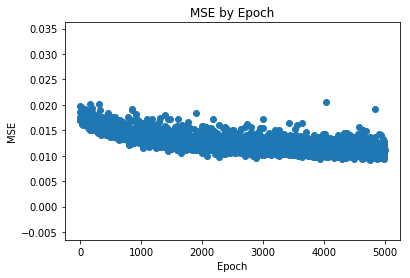

In [40]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')

## Abalone data set

In [41]:
columns = ["Sex", "Length", "Diameter", "Height", "Whole Weight",
           "Shucked weight", "Viscera weight", "Shell weight", "Rings" ]
df = pd.read_csv("abalone.data", names=columns)

df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


/home/ga/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


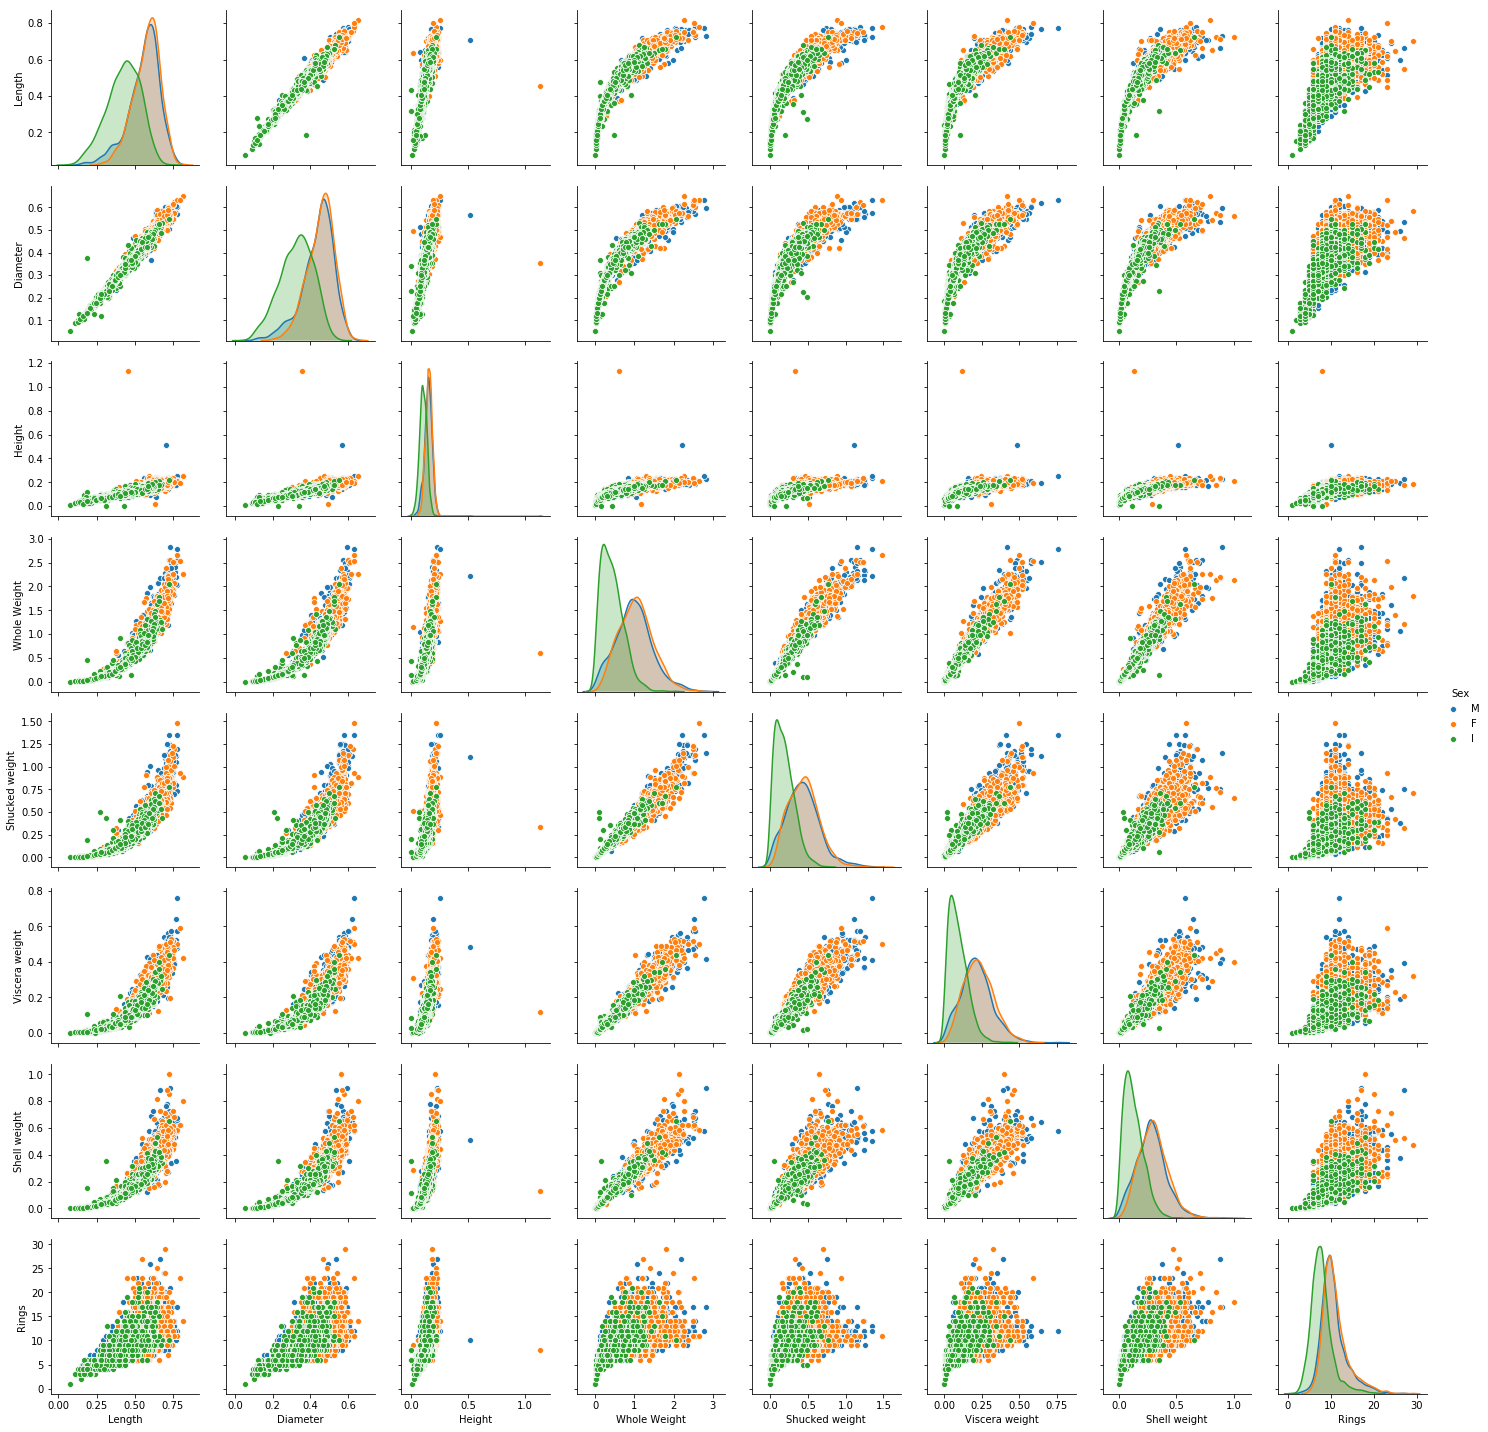

In [43]:
import seaborn as sns
sns.pairplot(data = df, hue = "Sex")
plt.show()

In [44]:
d = {'M': 0, 'F': 1, 'I': 2}
df["Sex"] = df["Sex"].apply(lambda x: d[x])

In [45]:
X = np.array(df[columns[1:]])
y = np.array(df["Sex"])
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

(4177, 8) (4177, 3)


In [47]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer.
# output_dim = number of neurons in current layer.

# First layer - input_dim=k features.
model.add(Dense(input_dim = 8, units = 6))
model.add(Activation("tanh"))

model.add(Dense(input_dim = 6, units = 6))
model.add(Activation("tanh"))

# Output layer - output_dim=# of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(input_dim = 6, units = 3))
model.add(Activation("softmax"))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer=SGD(lr=0.1))

In [49]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split = 0.1, epochs = 1000, 
                 batch_size=16, verbose = True)

print(loss.history['loss'][-1])   # displays MSE at last iteration
print("Training complete")

Training...
Train on 3759 samples, validate on 418 samples
Epoch 1/1000
3759/3759 [==============================] - 0s 90us/step - loss: 0.1751 - val_loss: 0.1733
Epoch 2/1000
3759/3759 [==============================] - 0s 71us/step - loss: 0.1746 - val_loss: 0.1737
Epoch 3/1000
3759/3759 [==============================] - 0s 76us/step - loss: 0.1748 - val_loss: 0.1802
Epoch 4/1000
3759/3759 [==============================] - 0s 78us/step - loss: 0.1749 - val_loss: 0.1737
Epoch 5/1000
3759/3759 [==============================] - 0s 102us/step - loss: 0.1748 - val_loss: 0.1730
Epoch 6/1000
3759/3759 [==============================] - 0s 82us/step - loss: 0.1751 - val_loss: 0.1750
Epoch 7/1000
3759/3759 [==============================] - 0s 82us/step - loss: 0.1754 - val_loss: 0.1741
Epoch 8/1000
3759/3759 [==============================] - 0s 105us/step - loss: 0.1751 - val_loss: 0.1730
Epoch 9/1000
3759/3759 [==============================] - 0s 83us/step - loss: 0.1746 - val_loss: 0

KeyboardInterrupt: 

ACCURACY:  0.545846301173
CONFUSION MATRIX:
 [[1155   72  301]
 [1031   80  196]
 [ 275   22 1045]]


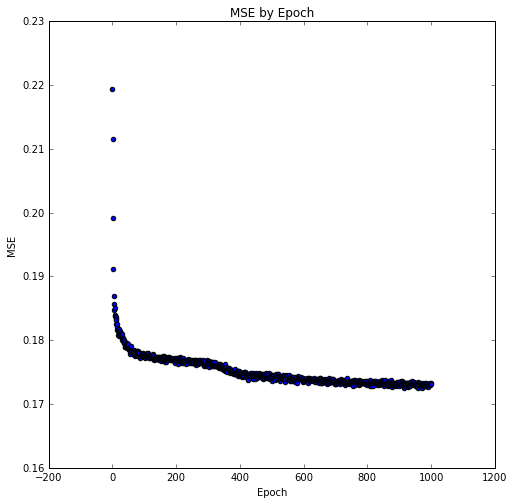

In [25]:
# Model evaluation
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')

## Exercise

Classify the following data ([source](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope)). Design a neural network to classify the data and evaluate the results.

In [28]:
names = "fLength fWidth fSize fConc fConc1 fAsym fM3Long fM3Trans fAlpha fDist class".split()
df = pd.read_csv("magic04.data", names=names)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [29]:
d = {'g': 0, 'h': 1}
df["class"] = df["class"].apply(lambda x: d[x])

In [30]:
X = np.array(df[df.columns[:-1]])
y = np.array(df["class"])
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

(19020, 10) (19020, 2)


In [45]:
##Create the model:

In [46]:
##Train the model:

In [48]:
##Evaluate the model